# Optimise multiplet parameters using the standards

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # suppress annoying warnings

import sys
sys.path.append('/home/rstudio/codes')

from IPython.display import display, HTML
import seaborn as sns

from pyBatman import PyBatmanPipeline, sub_dir_path

## 1. Setup the pipeline

In [2]:
background_dir = '/home/rstudio/NMR/background'
output_dir = '/home/rstudio/NMR/results'
database_file = '/home/rstudio/codes/databases/default_db.csv'

In [3]:
input_backgrounds = sub_dir_path(background_dir)
pipeline = PyBatmanPipeline(input_backgrounds, 'cpmg', '.', database_file)

In [4]:
print pipeline.tsp_range

(-0.05, 0.05)


## 2. Load spiked metabolites

In [5]:
std_concentrations = [50, 100, 250, 500]

In [6]:
names = sorted(pipeline.db.metabolites.keys())
lower_names = {}
for name in names:
    tokens = name.split('_')
    value = tokens[0].lower()
    lower_names[name] = value
names = sorted(set(lower_names.values()))

Loading Acetate_1.9
Loading spectra for Acetate_1.9 (50)


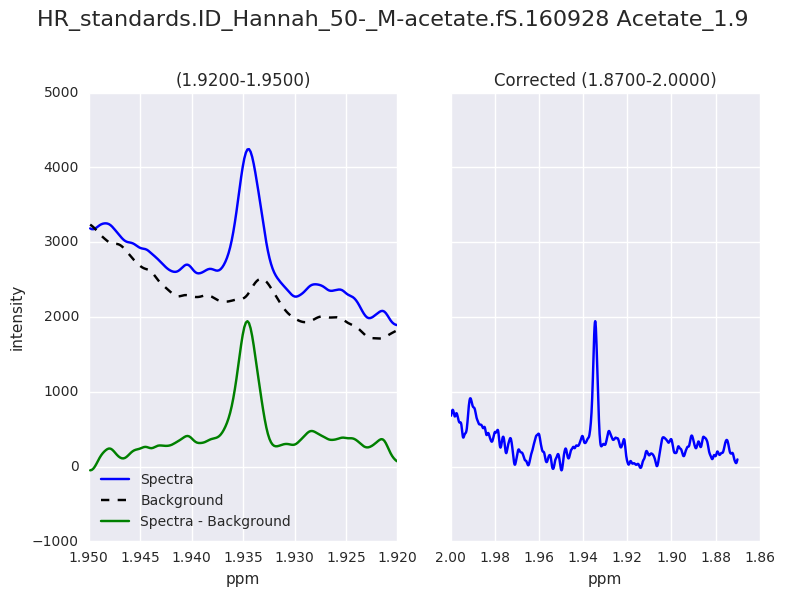

Loading spectra for Acetate_1.9 (100)


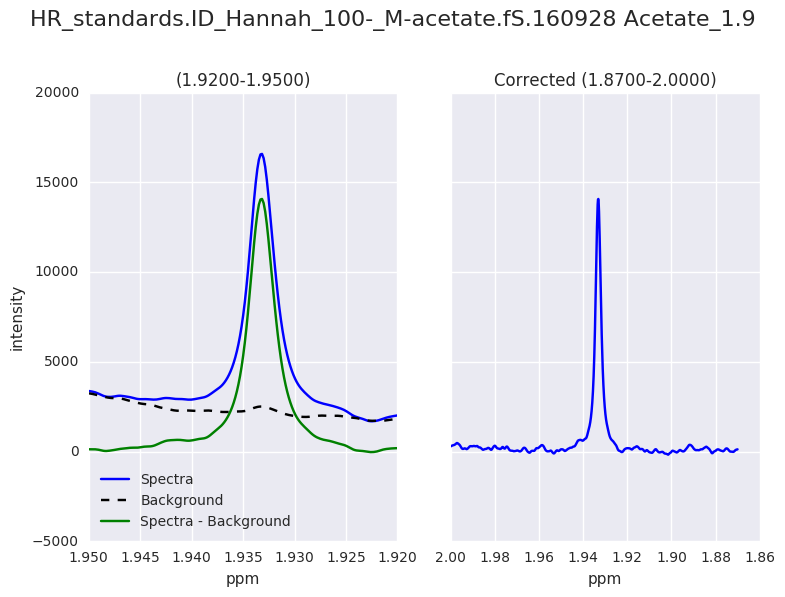

Loading spectra for Acetate_1.9 (250)


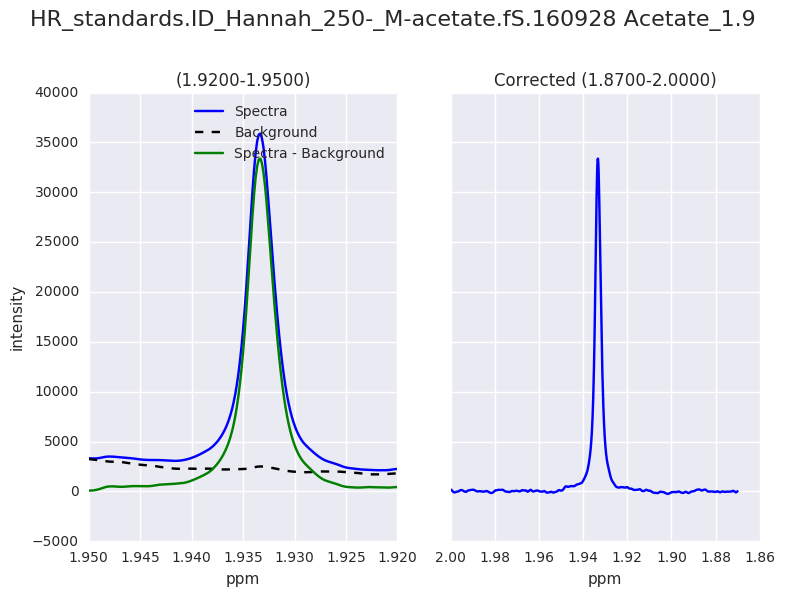

Loading spectra for Acetate_1.9 (500)


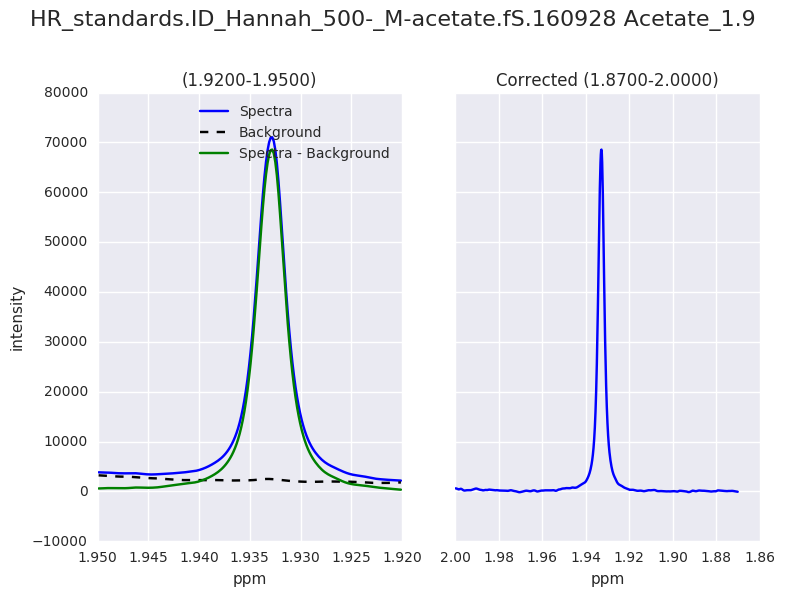



Loading Alanine_1.5
Loading spectra for Alanine_1.5 (50)


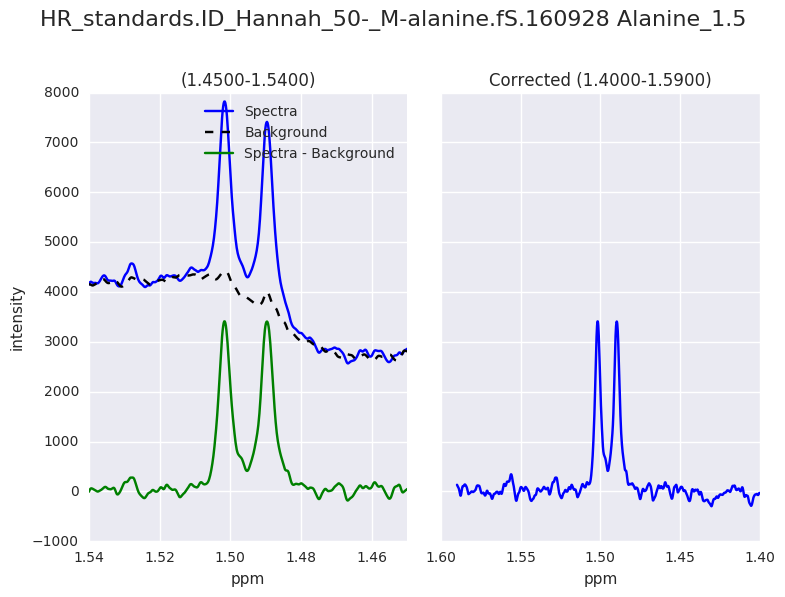

Loading spectra for Alanine_1.5 (100)


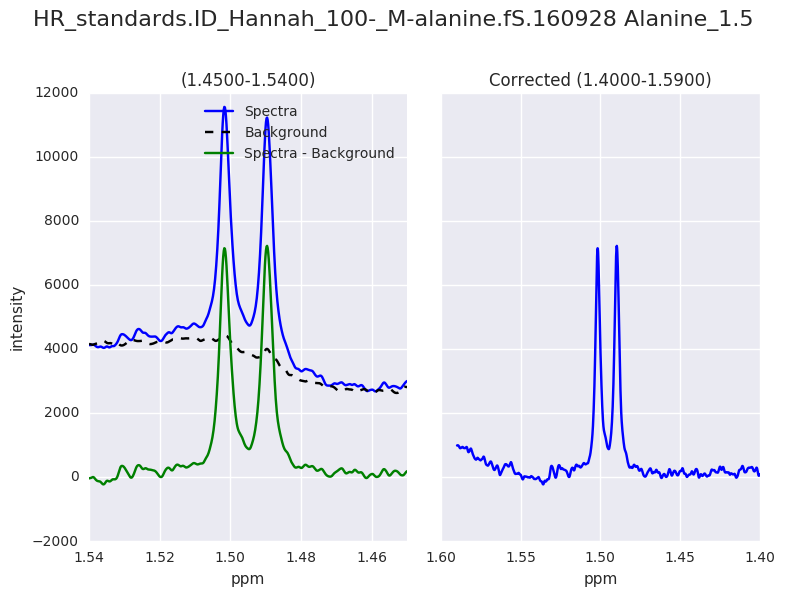

Loading spectra for Alanine_1.5 (250)


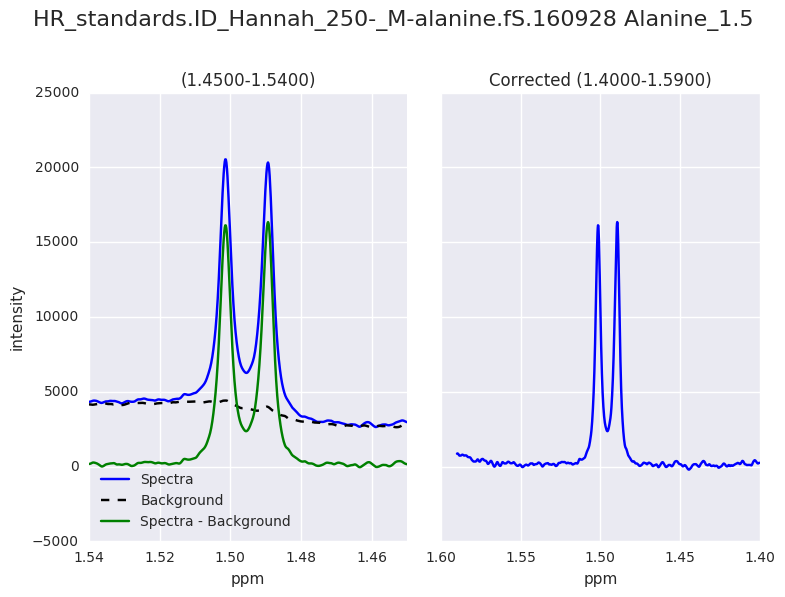

Loading spectra for Alanine_1.5 (500)


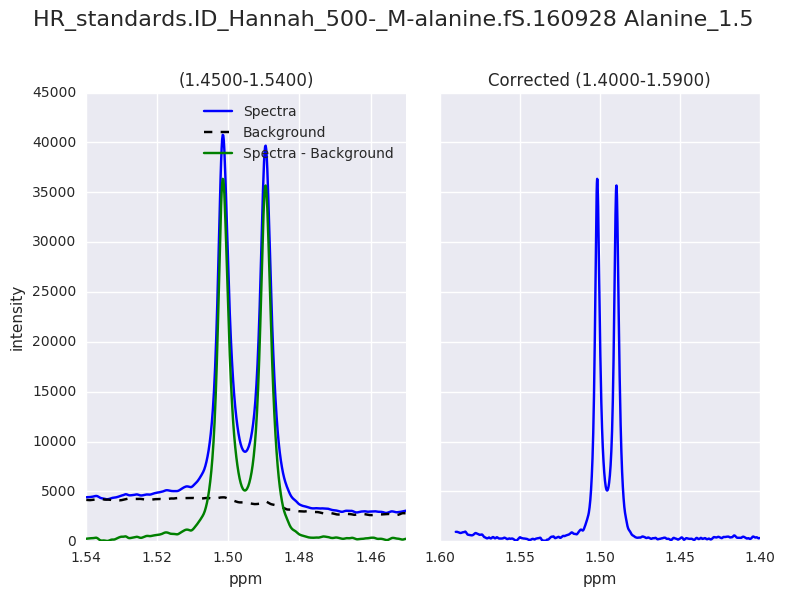



Loading Citrate_2.6
Loading spectra for Citrate_2.6 (50)


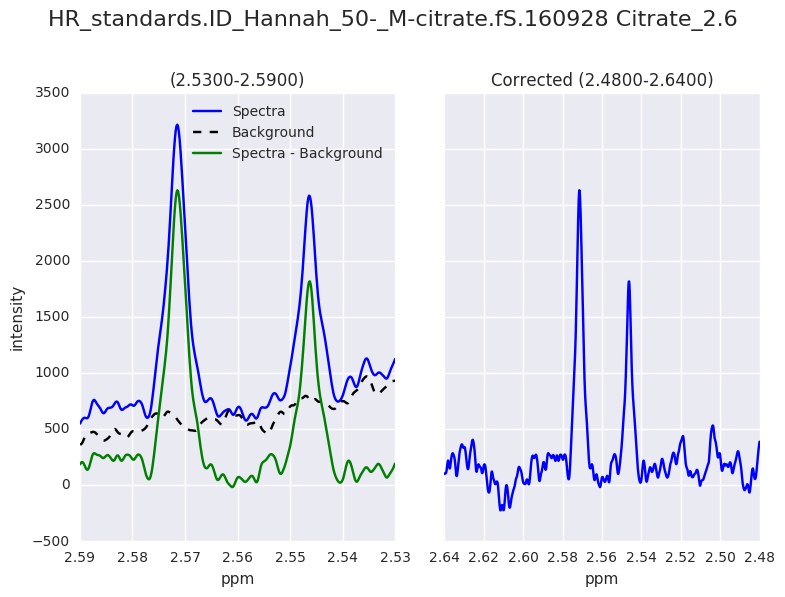

Loading spectra for Citrate_2.6 (100)


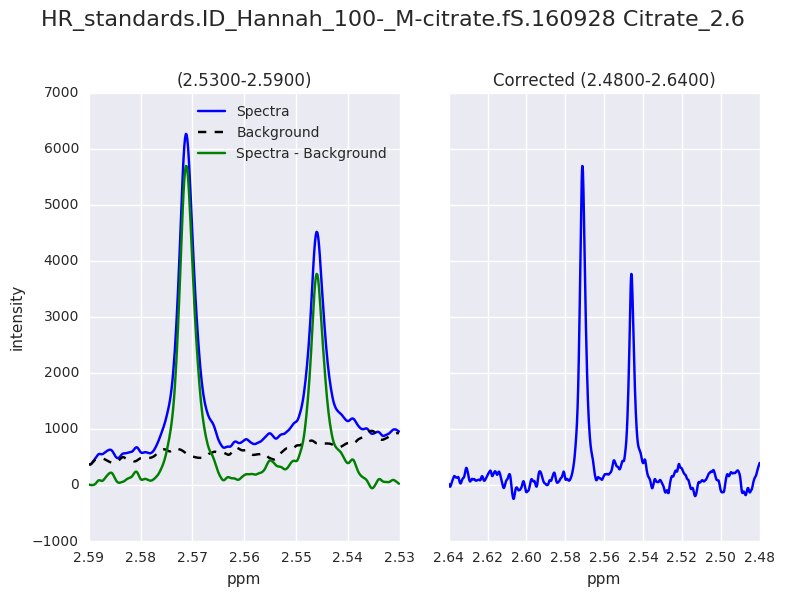

Loading spectra for Citrate_2.6 (250)


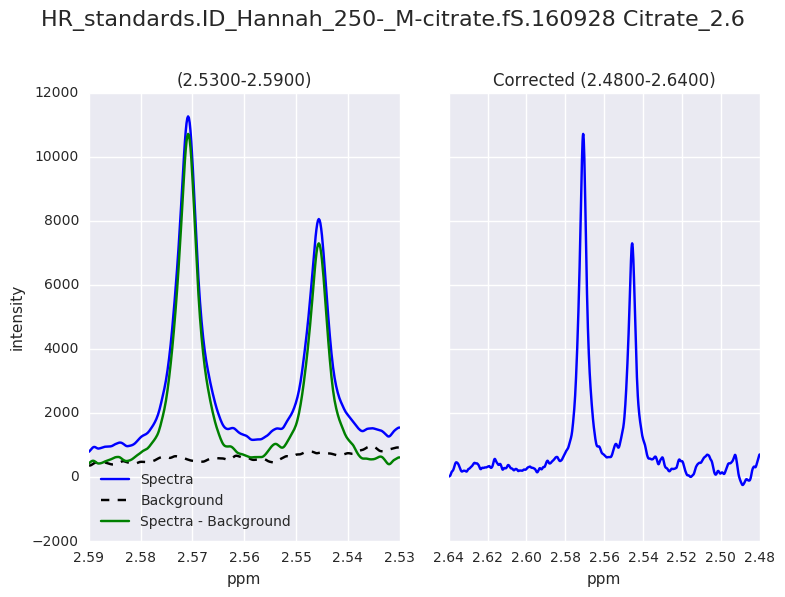

Loading spectra for Citrate_2.6 (500)


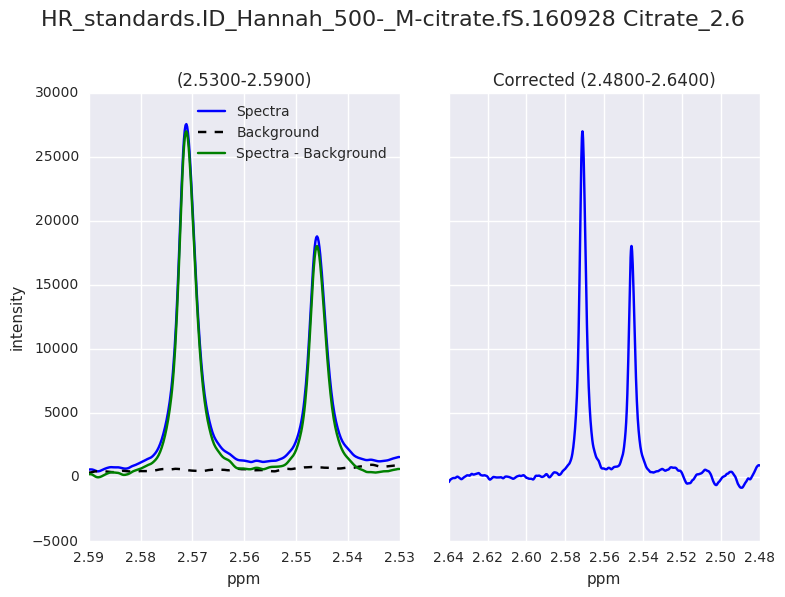



Loading Citrate_2.7
Loading spectra for Citrate_2.7 (50)


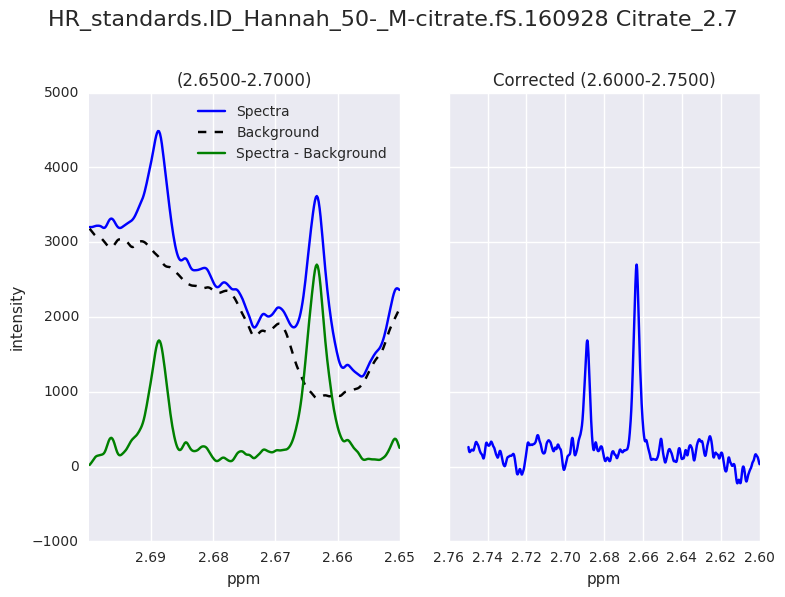

Loading spectra for Citrate_2.7 (100)


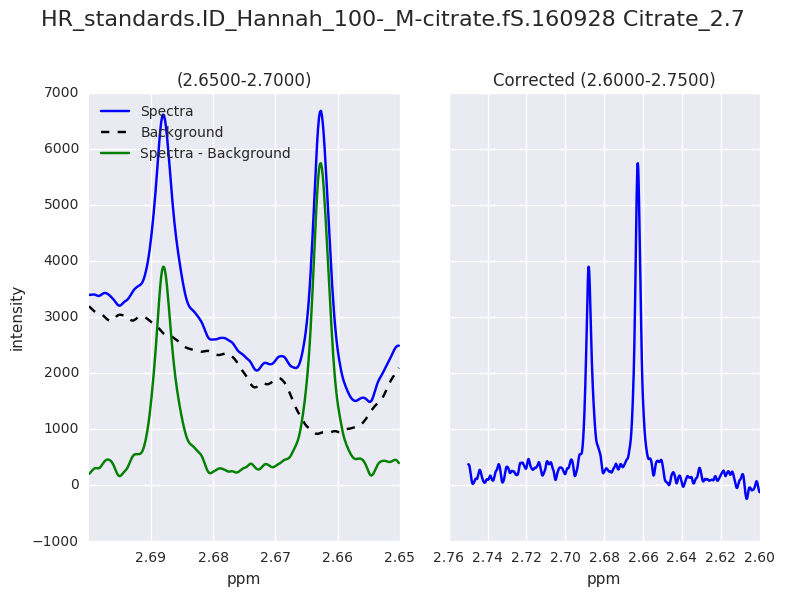

Loading spectra for Citrate_2.7 (250)


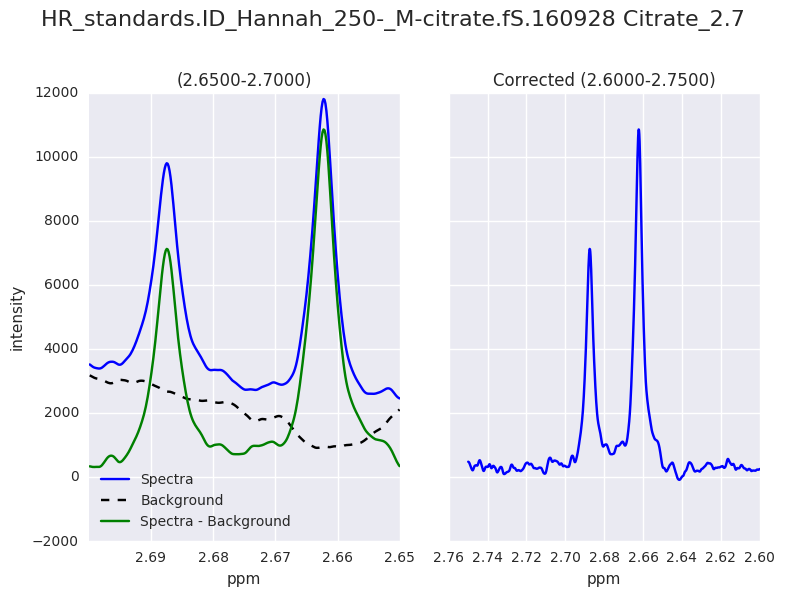

Loading spectra for Citrate_2.7 (500)


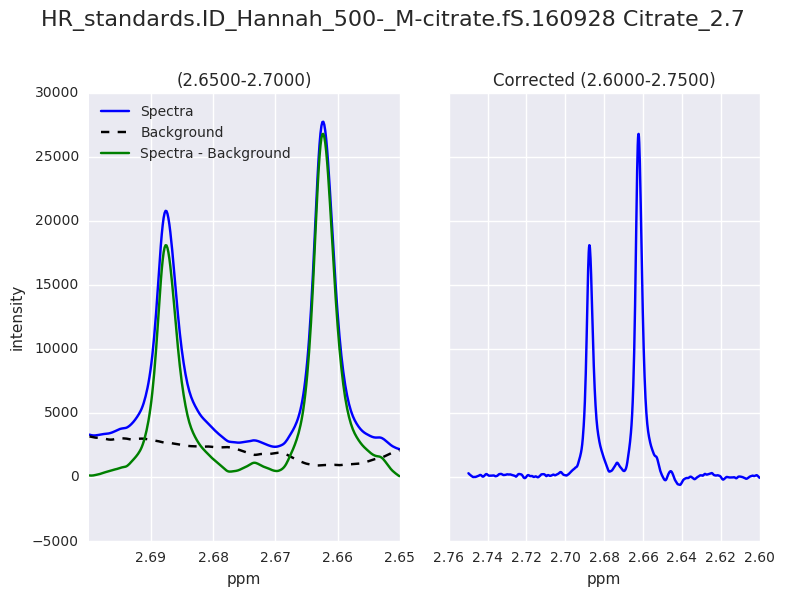



Loading Glucose_5.3
Loading spectra for Glucose_5.3 (50)


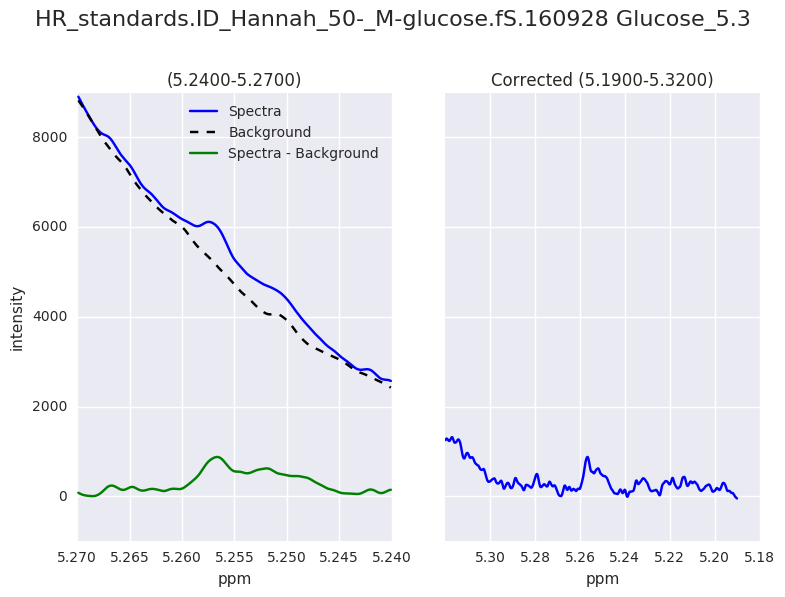

Loading spectra for Glucose_5.3 (100)


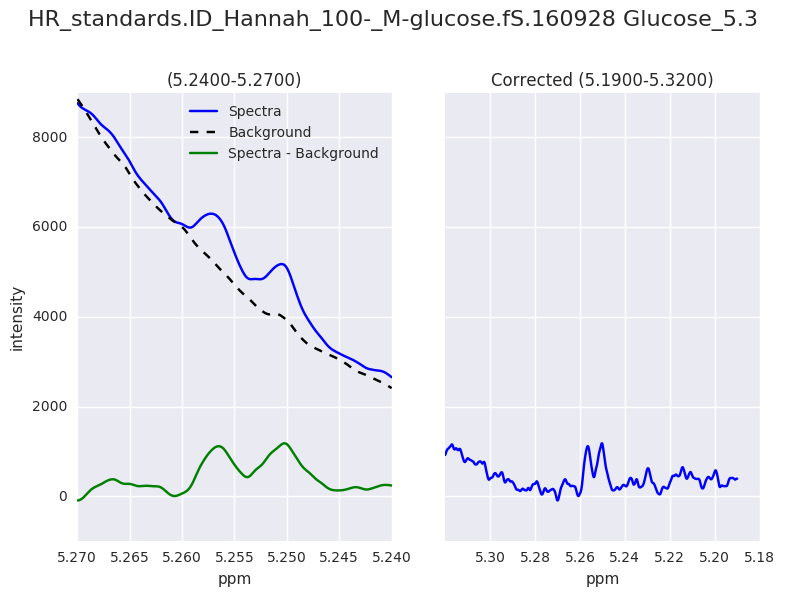

Loading spectra for Glucose_5.3 (250)


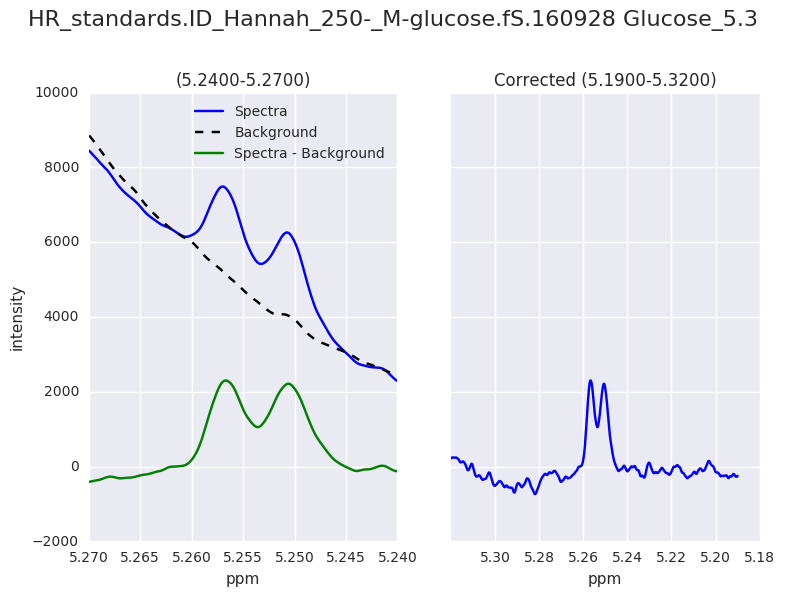

Loading spectra for Glucose_5.3 (500)


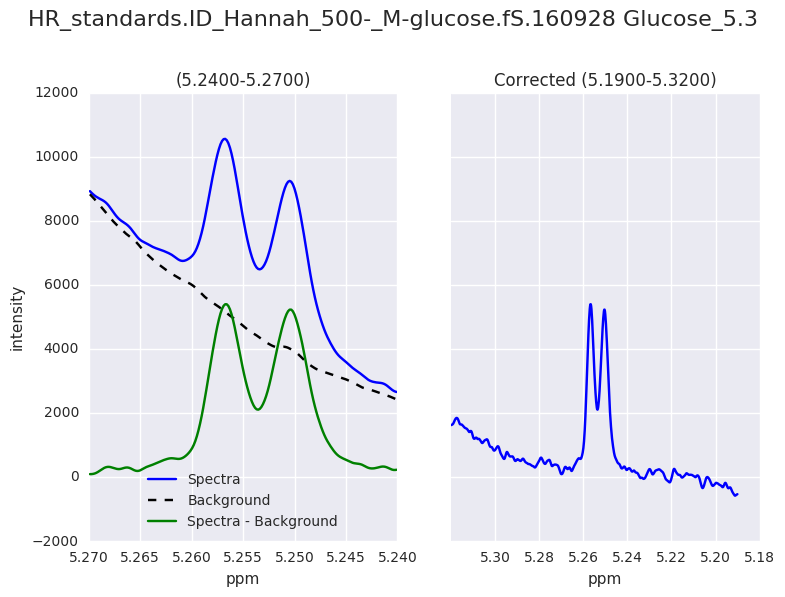



Loading Histidine_7.1
Loading spectra for Histidine_7.1 (50)


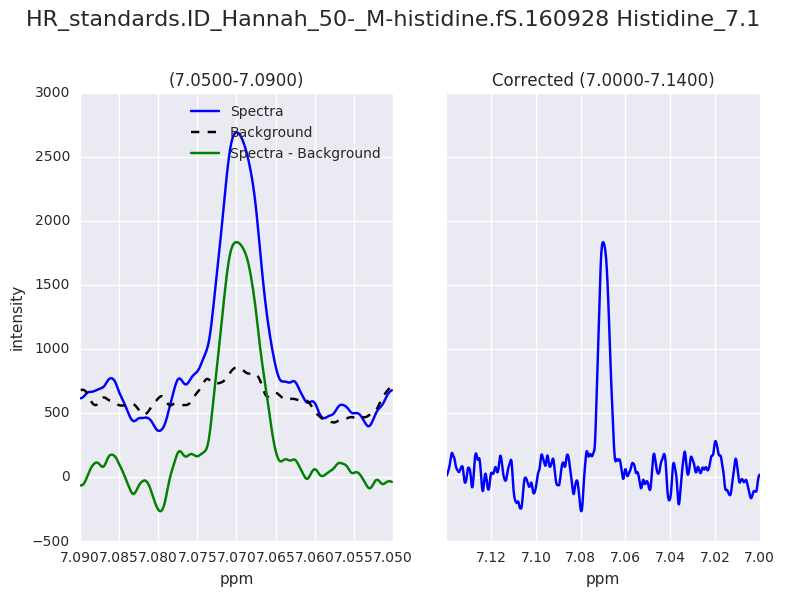

Loading spectra for Histidine_7.1 (100)


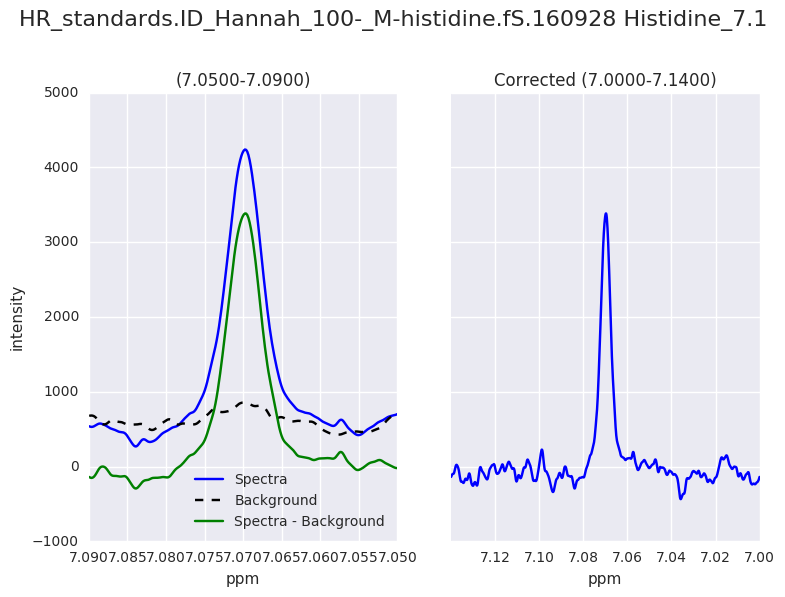

Loading spectra for Histidine_7.1 (250)


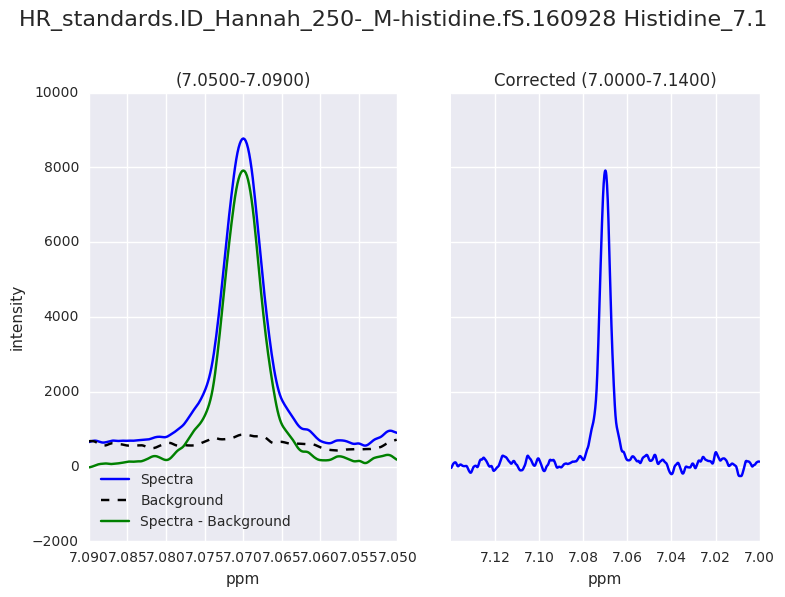

Loading spectra for Histidine_7.1 (500)


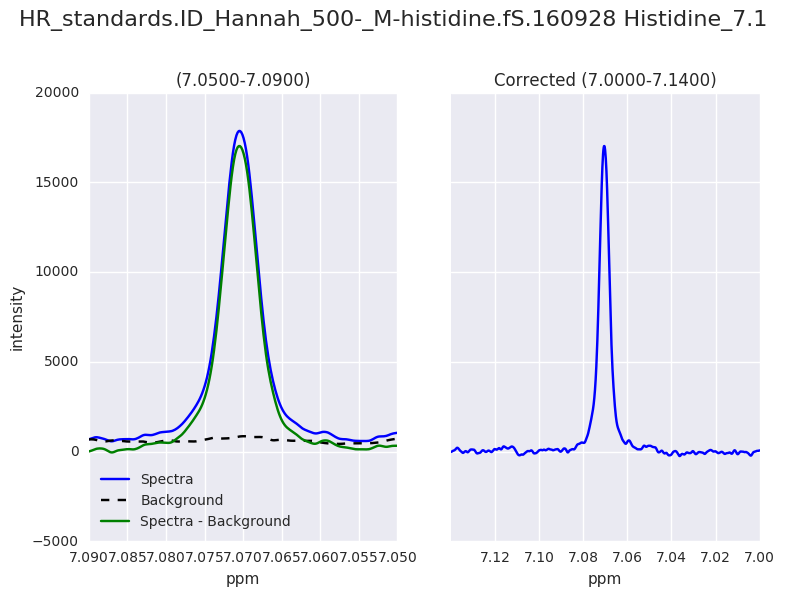



Loading Histidine_7.8
Loading spectra for Histidine_7.8 (50)


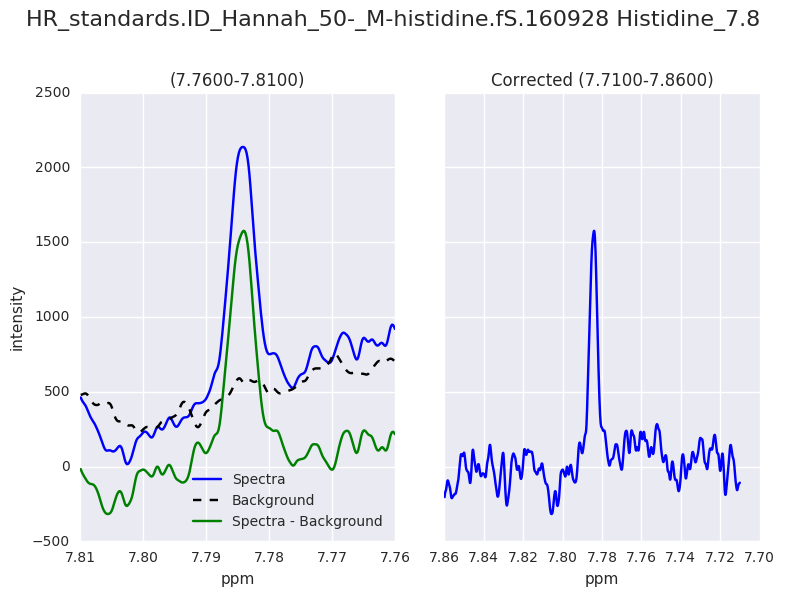

Loading spectra for Histidine_7.8 (100)


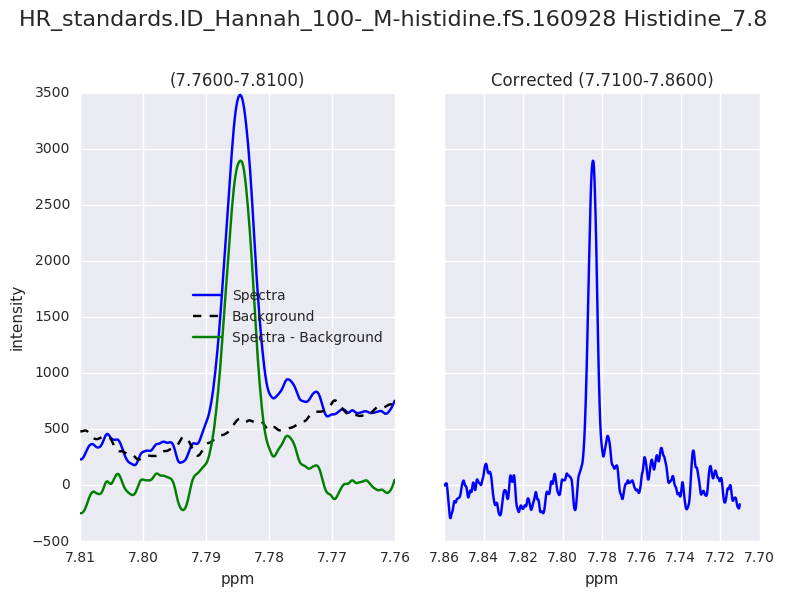

Loading spectra for Histidine_7.8 (250)


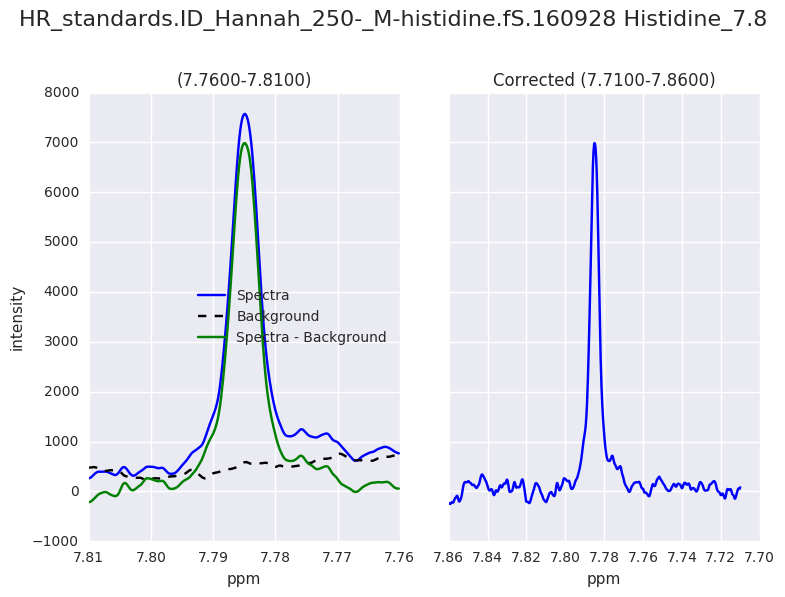

Loading spectra for Histidine_7.8 (500)


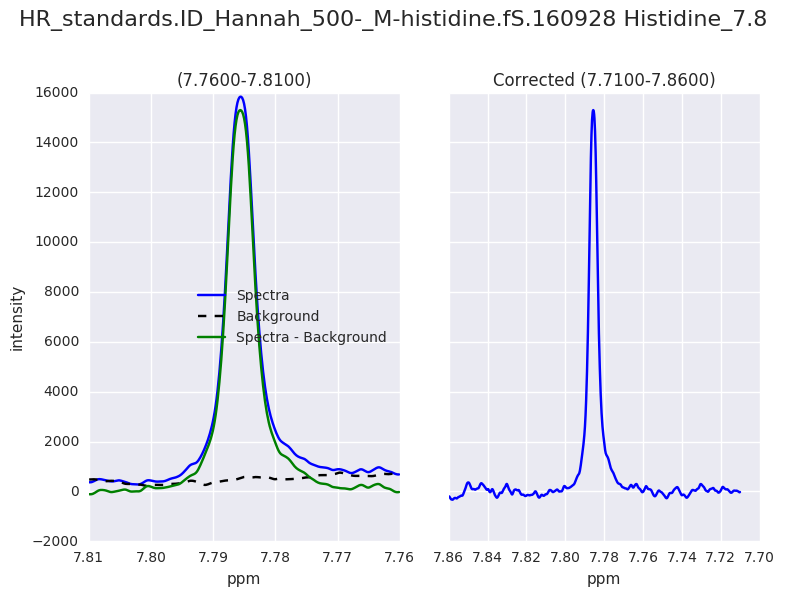



Loading Isoleucine_0.9
Loading spectra for Isoleucine_0.9 (50)


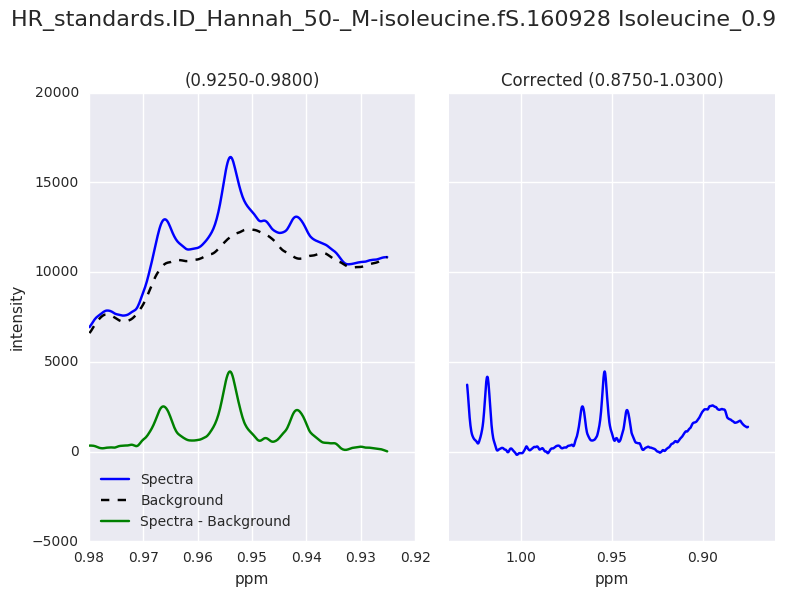

Loading spectra for Isoleucine_0.9 (100)


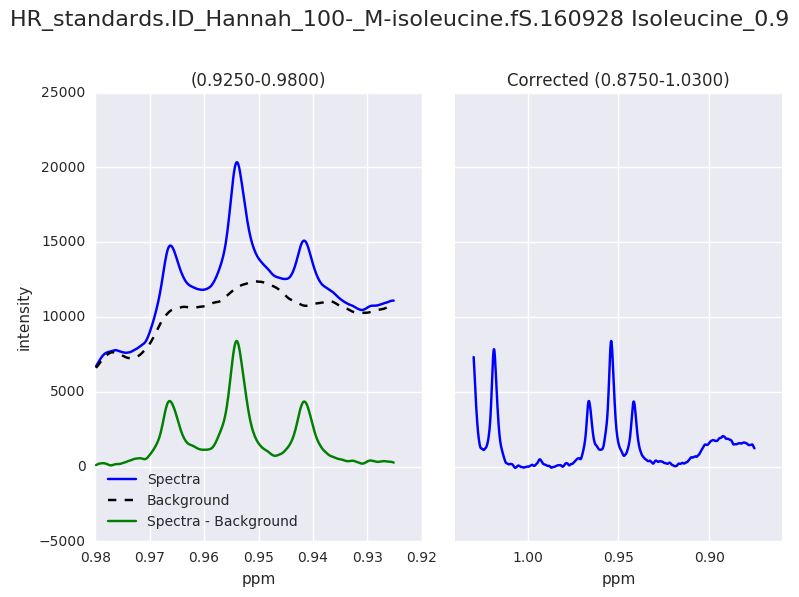

Loading spectra for Isoleucine_0.9 (250)


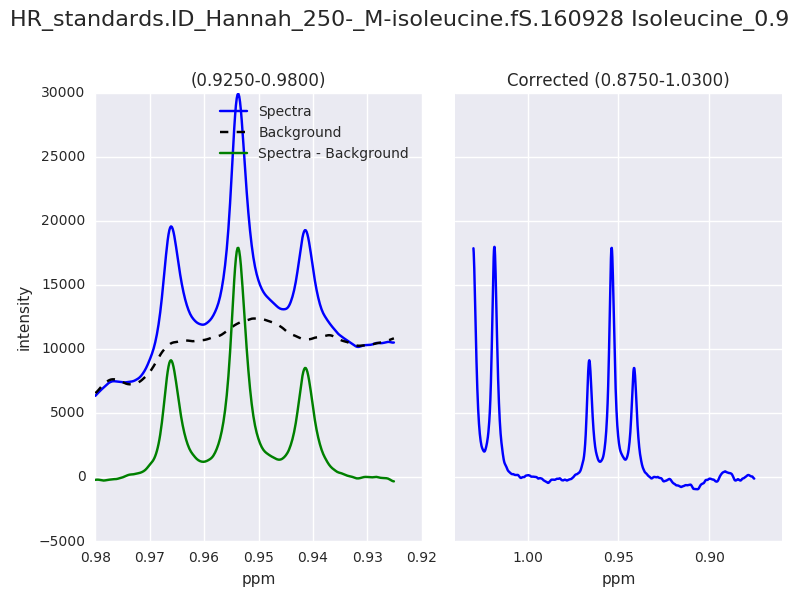

Loading spectra for Isoleucine_0.9 (500)


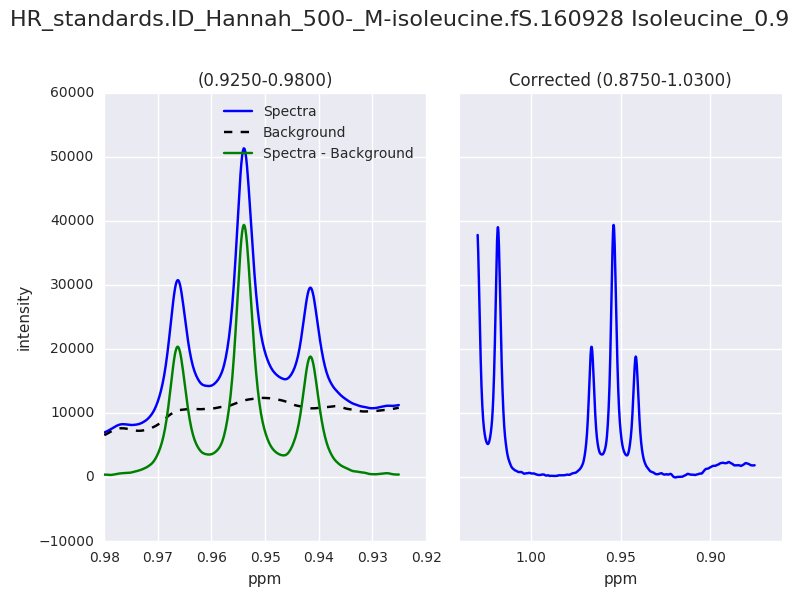



Loading Isoleucine_1.0
Loading spectra for Isoleucine_1.0 (50)


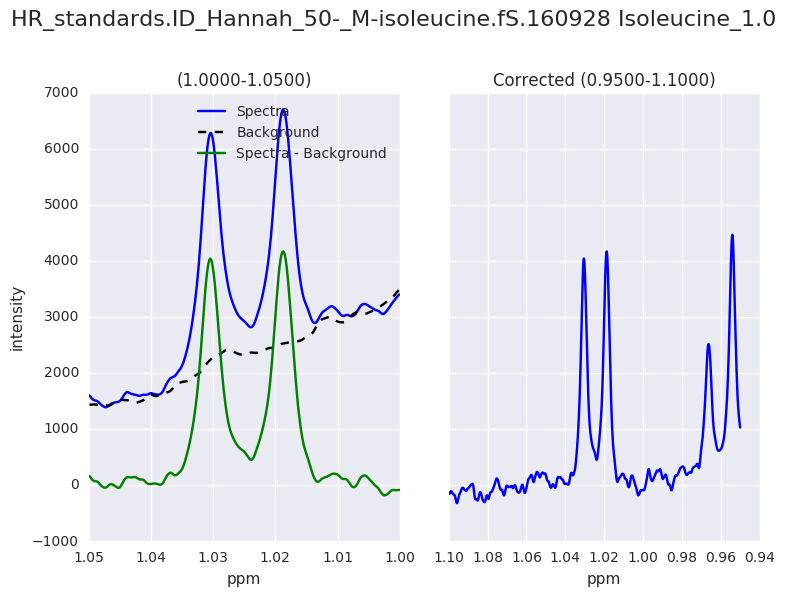

Loading spectra for Isoleucine_1.0 (100)


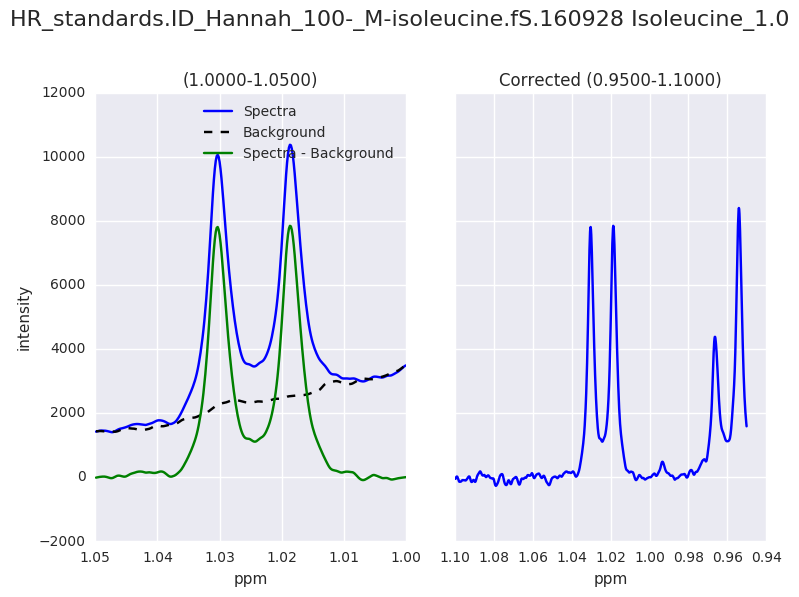

Loading spectra for Isoleucine_1.0 (250)


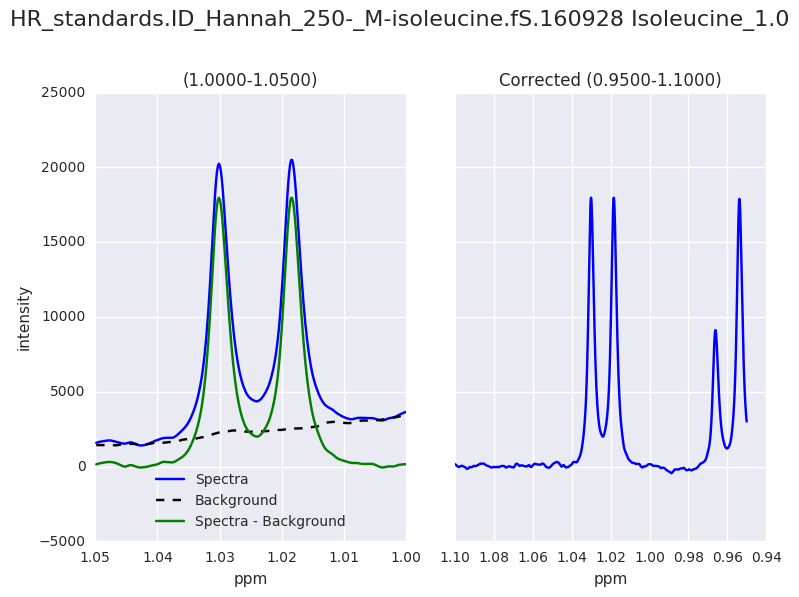

Loading spectra for Isoleucine_1.0 (500)


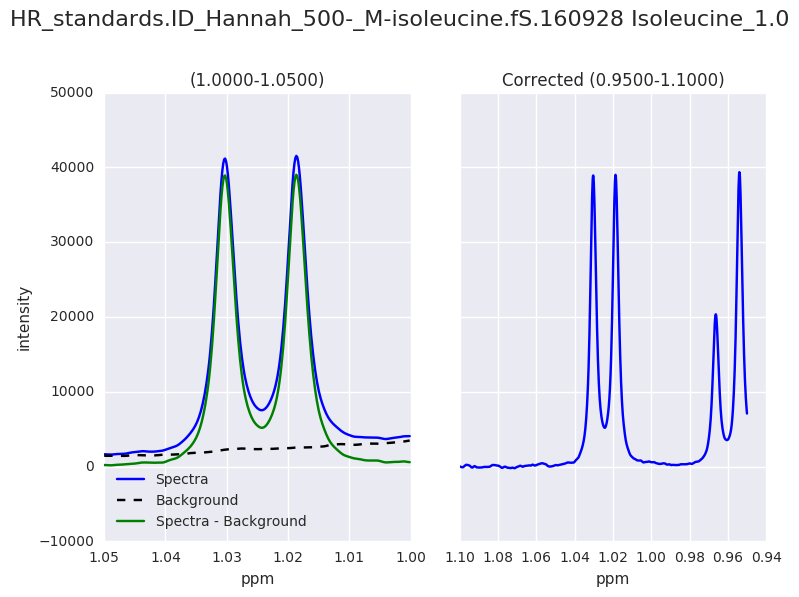



Loading Isoleucine_3.7
Loading spectra for Isoleucine_3.7 (50)


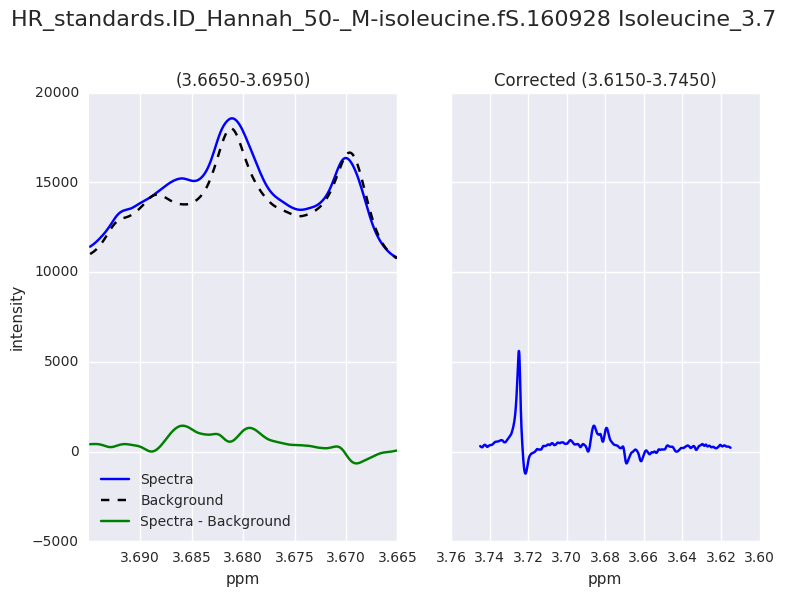

Loading spectra for Isoleucine_3.7 (100)


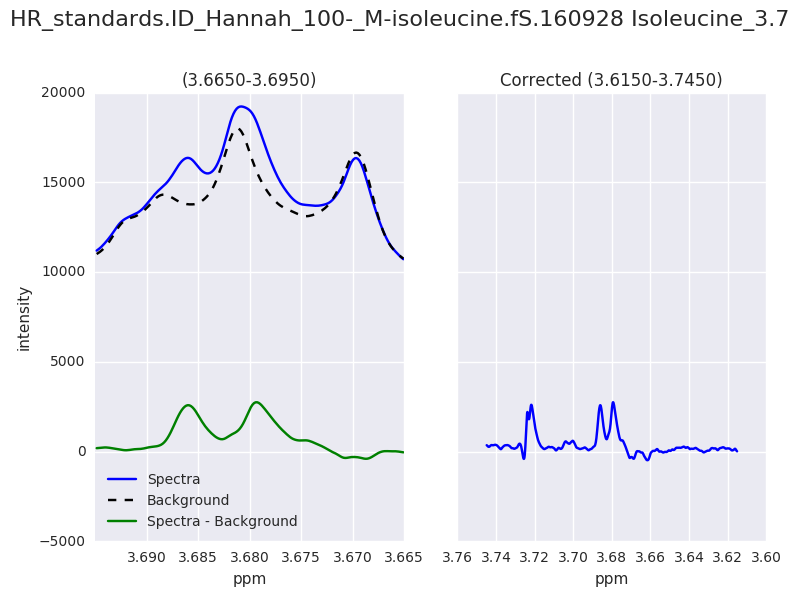

Loading spectra for Isoleucine_3.7 (250)


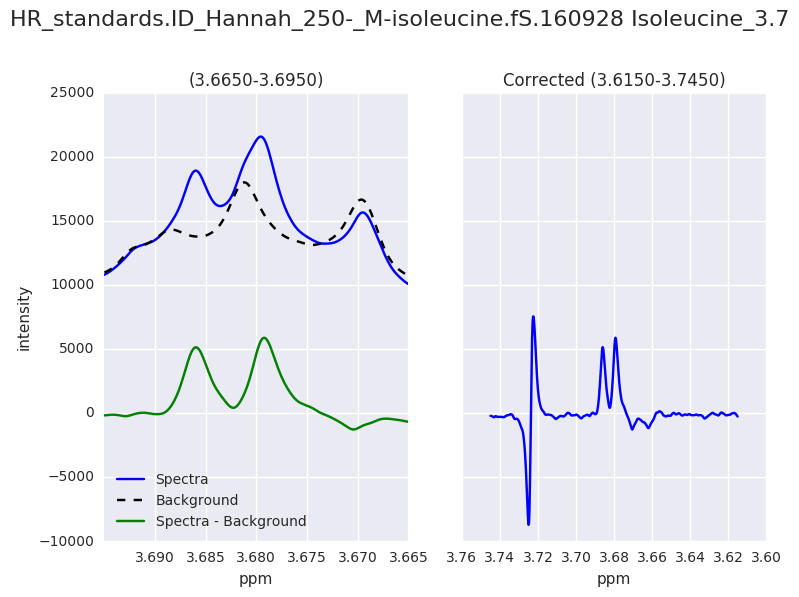

Loading spectra for Isoleucine_3.7 (500)


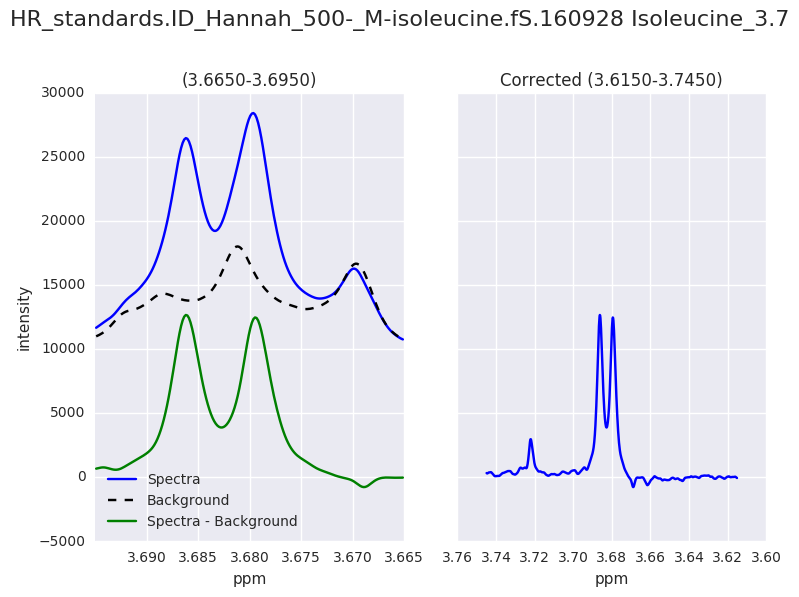



Loading Lactate_1.3
Loading spectra for Lactate_1.3 (50)


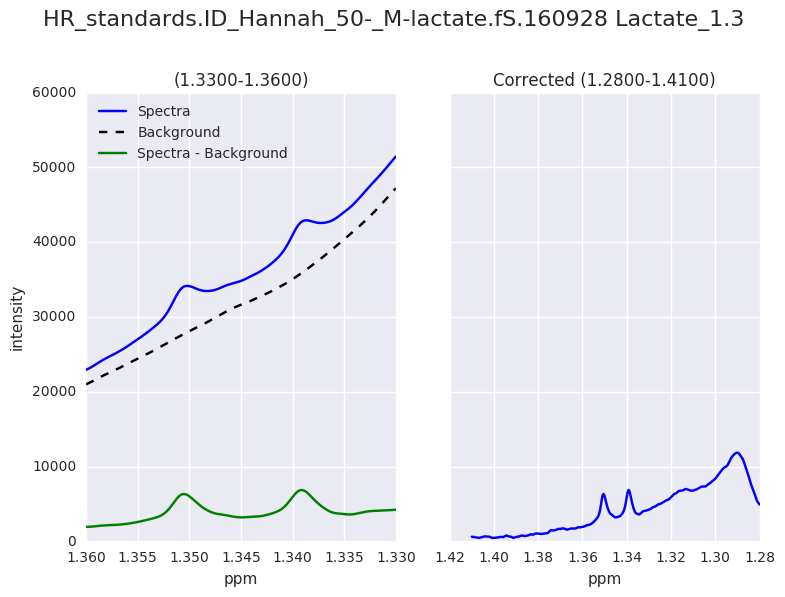

Loading spectra for Lactate_1.3 (100)


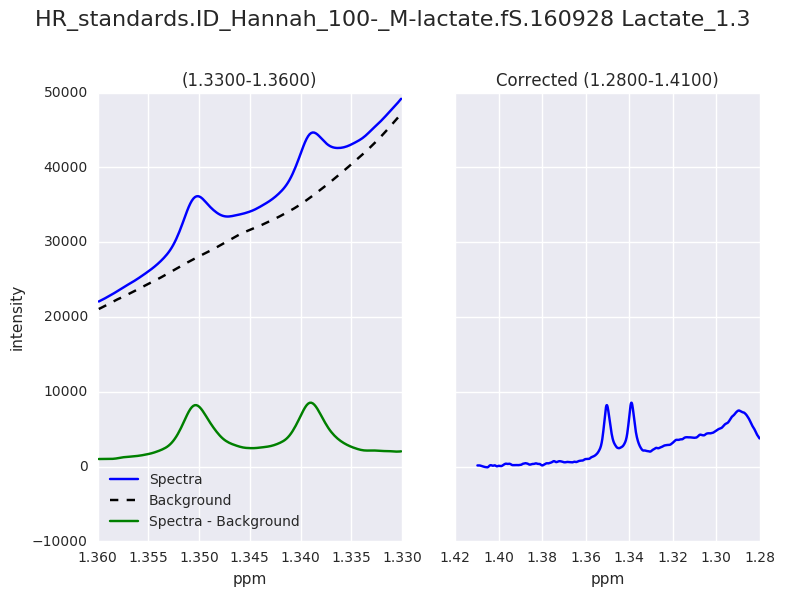

Loading spectra for Lactate_1.3 (250)


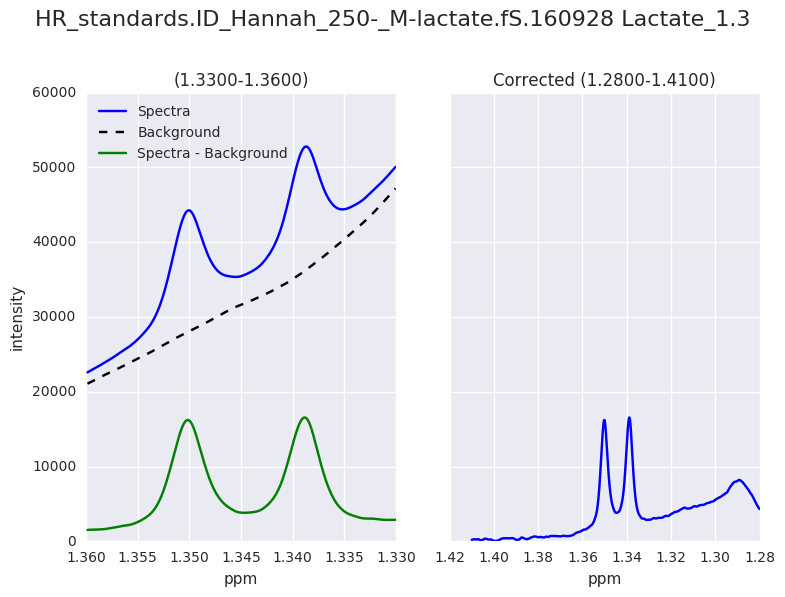

Loading spectra for Lactate_1.3 (500)


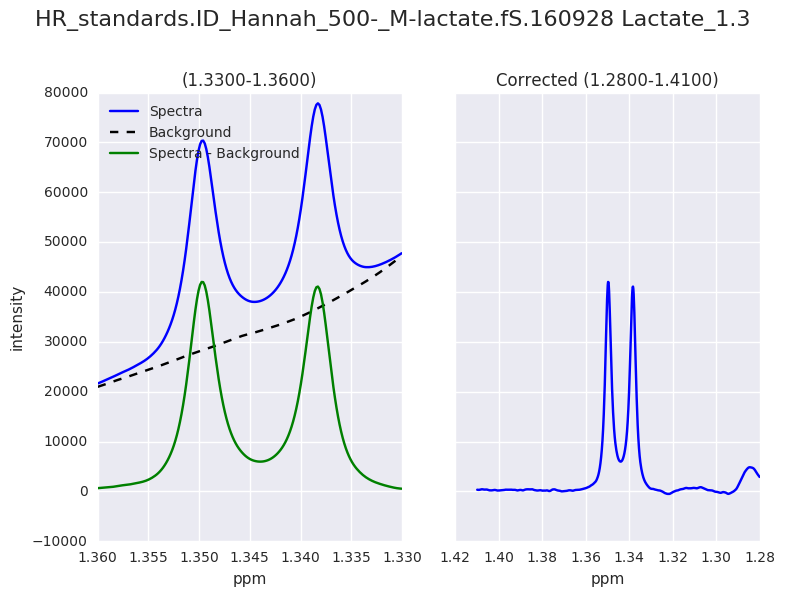



Loading Leucine_1.0
Loading spectra for Leucine_1.0 (50)


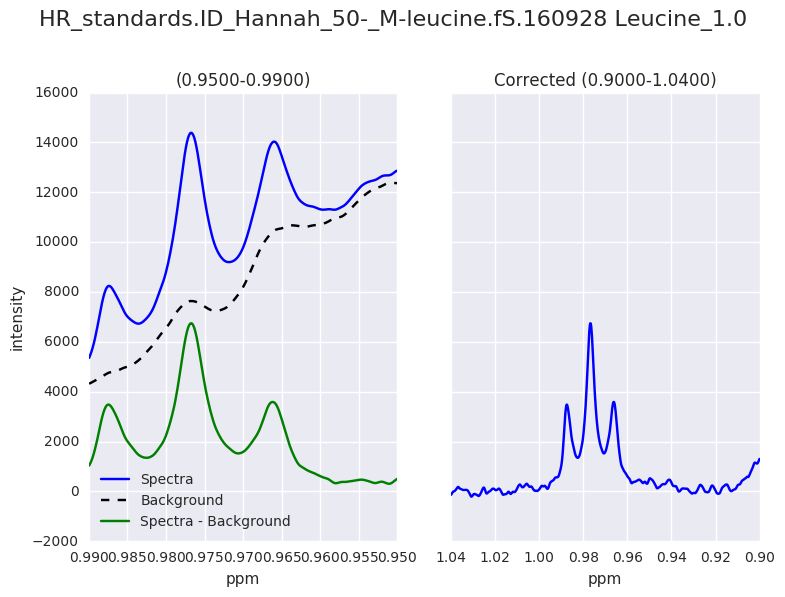

Loading spectra for Leucine_1.0 (100)


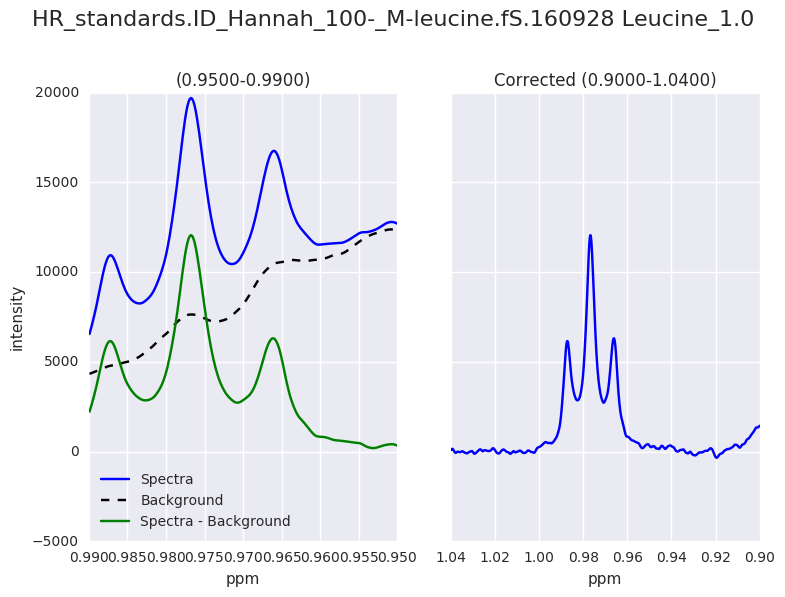

Loading spectra for Leucine_1.0 (250)


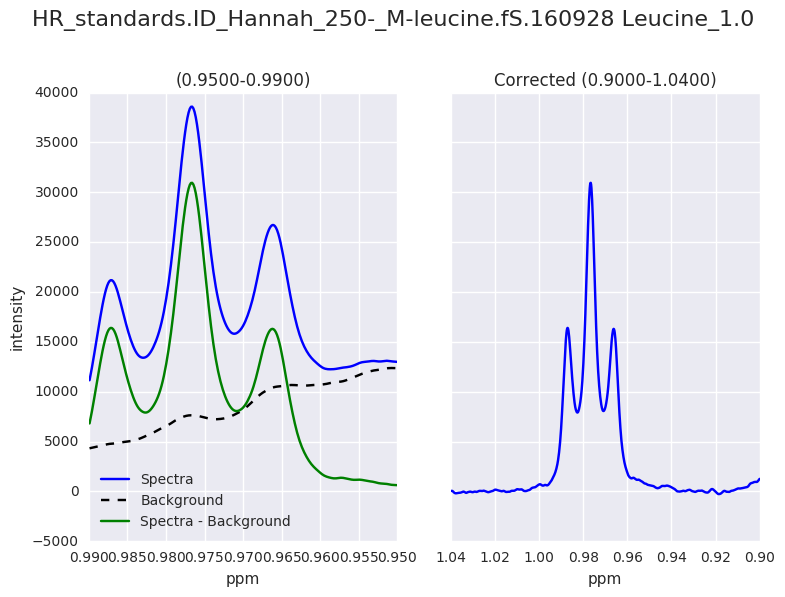

Loading spectra for Leucine_1.0 (500)


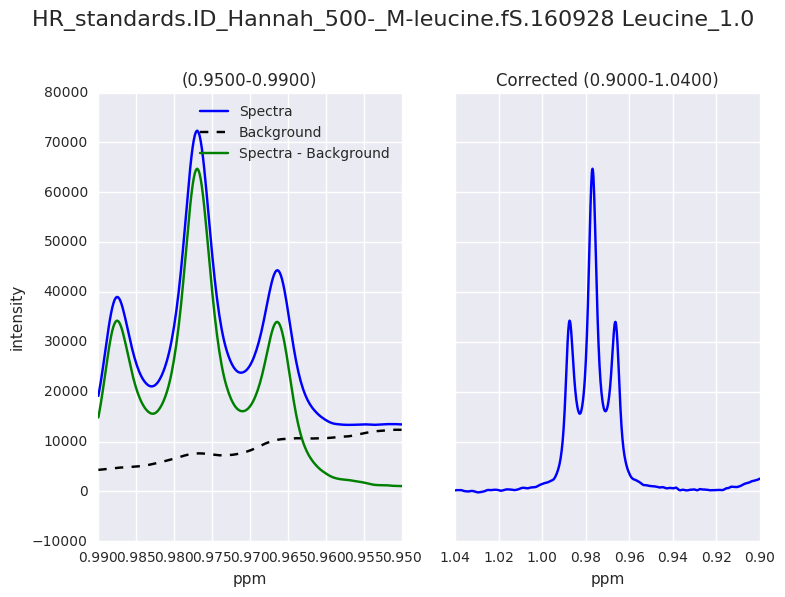



Loading Lysine_3.0
Loading spectra for Lysine_3.0 (50)


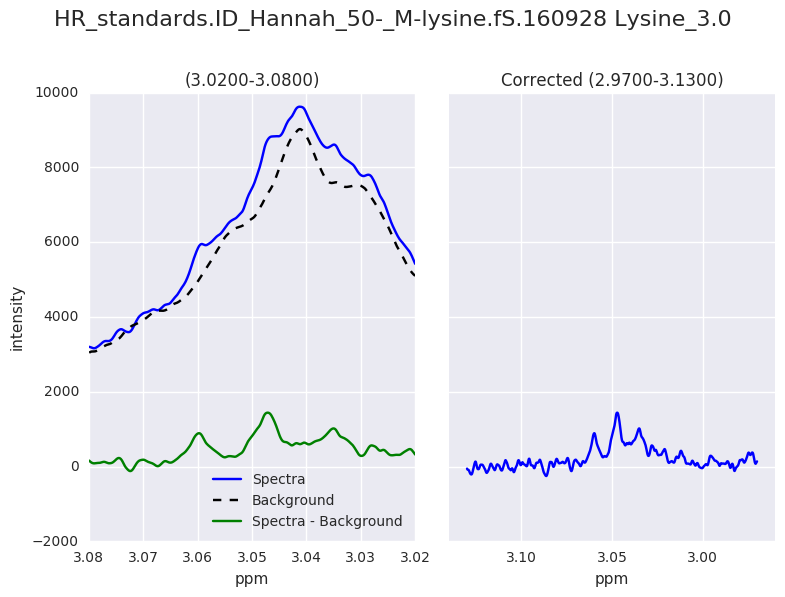

Loading spectra for Lysine_3.0 (100)


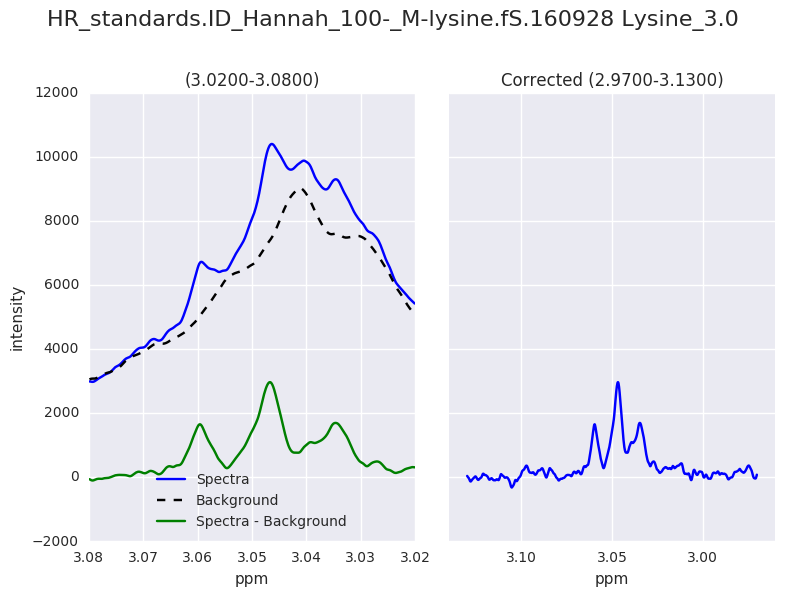

Loading spectra for Lysine_3.0 (250)


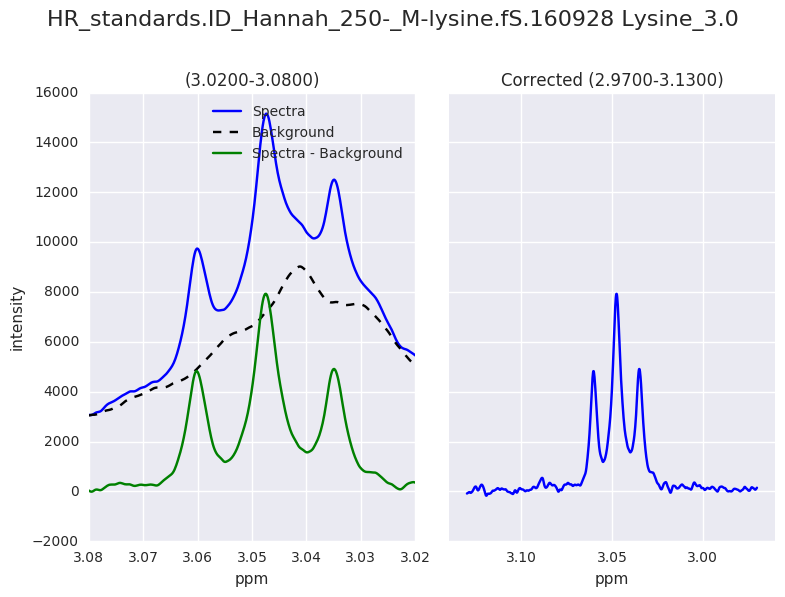

Loading spectra for Lysine_3.0 (500)


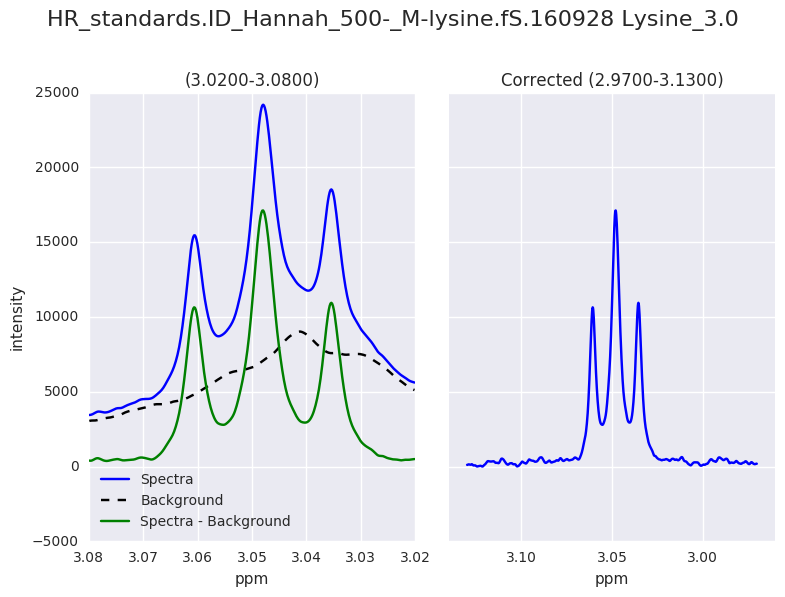



Loading Phenylalanine_7.3
Loading spectra for Phenylalanine_7.3 (50)


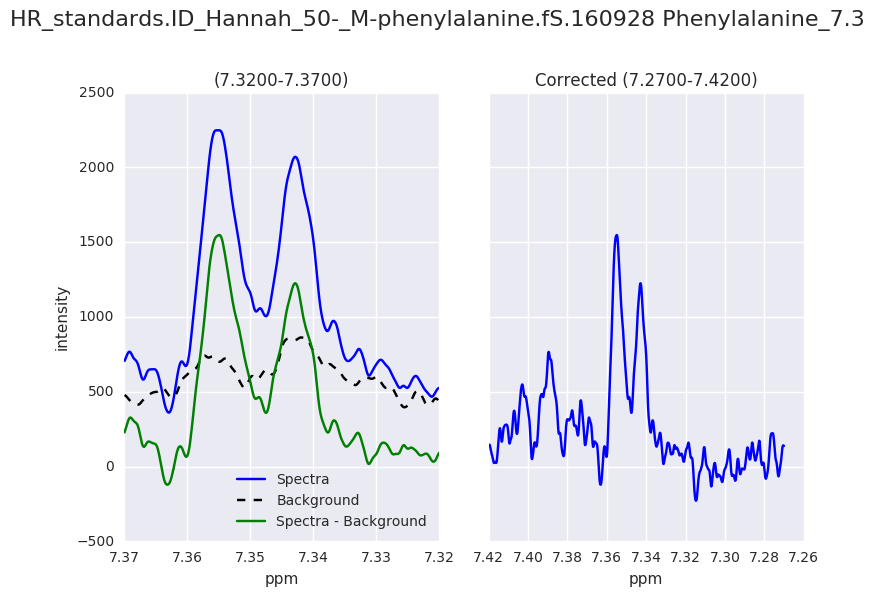

Loading spectra for Phenylalanine_7.3 (100)


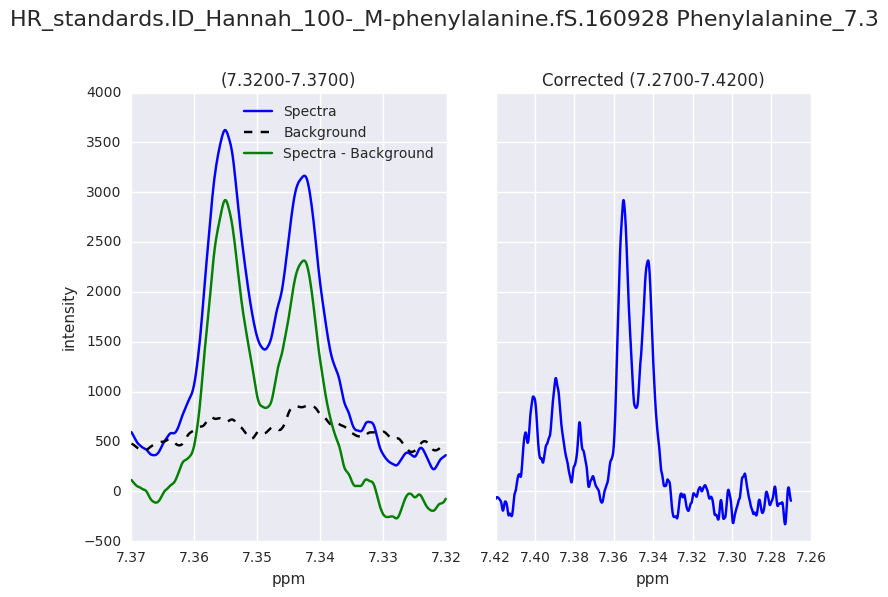

Loading spectra for Phenylalanine_7.3 (250)


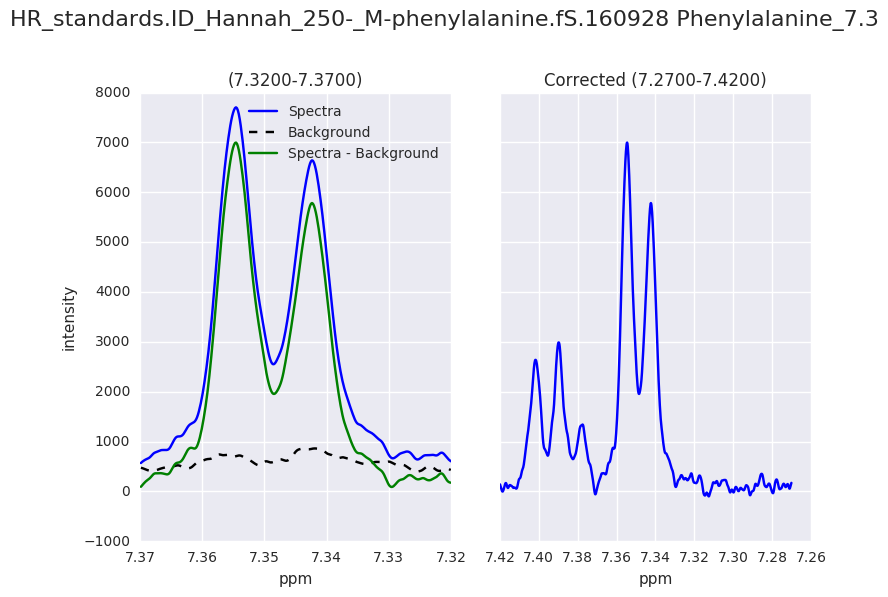

Loading spectra for Phenylalanine_7.3 (500)


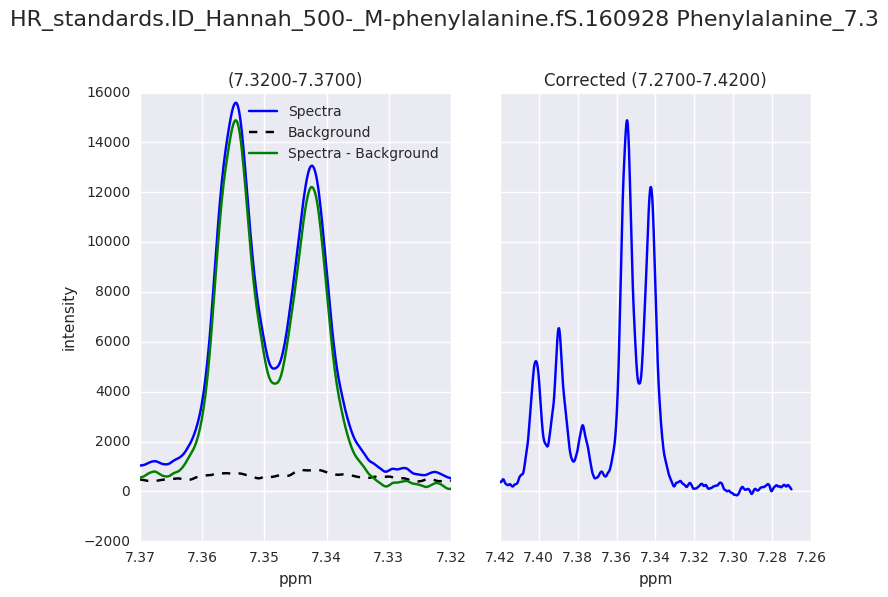



Loading TMAO_3.3
Loading spectra for TMAO_3.3 (50)


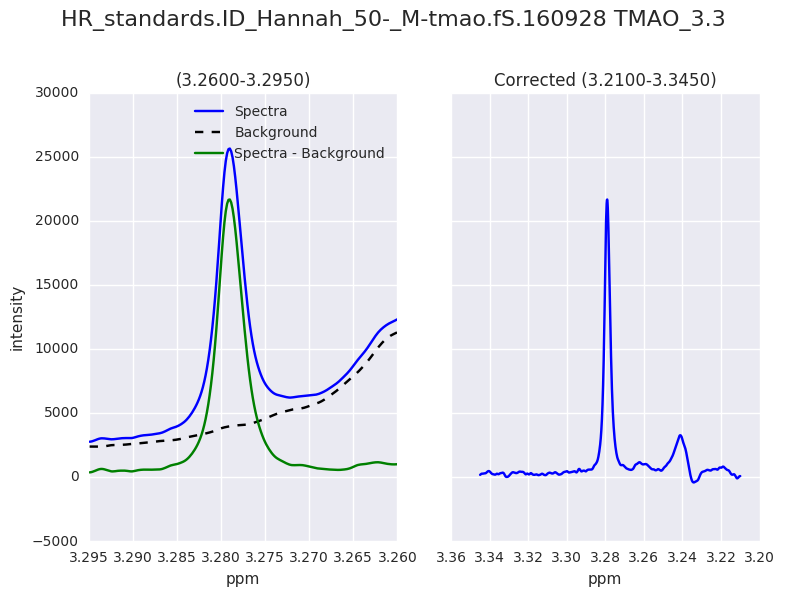

Loading spectra for TMAO_3.3 (100)


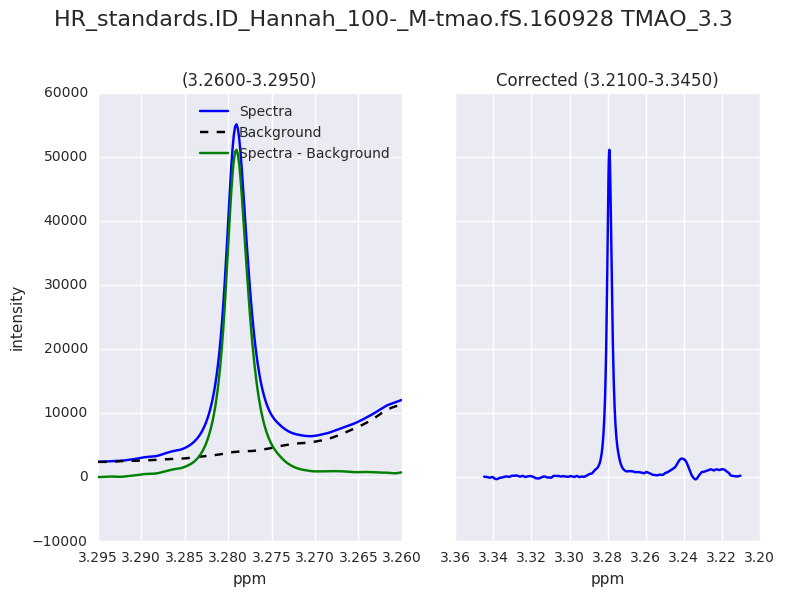

Loading spectra for TMAO_3.3 (250)


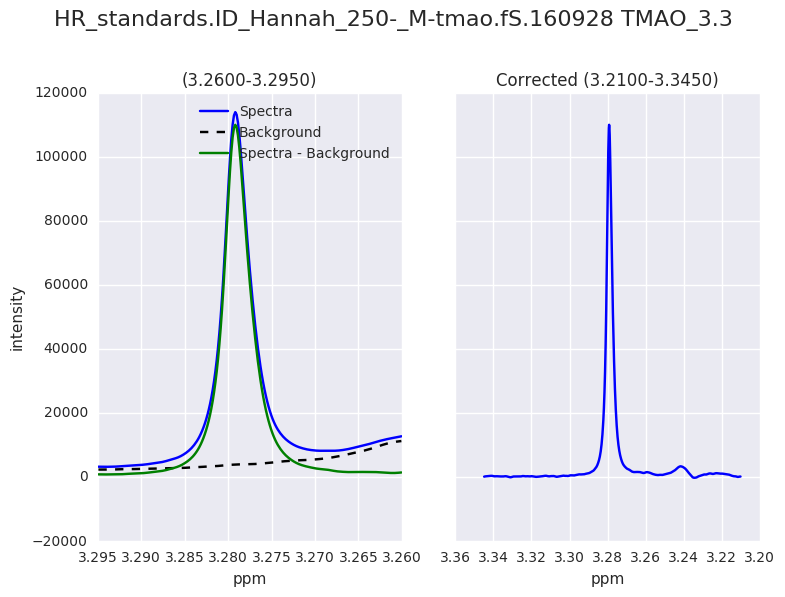

Loading spectra for TMAO_3.3 (500)


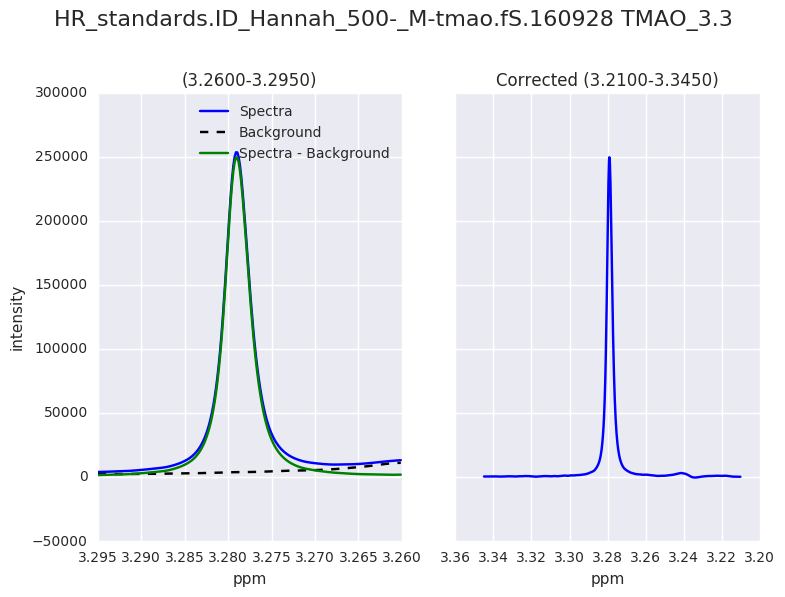



Loading Tyrosine_6.9
Loading spectra for Tyrosine_6.9 (50)


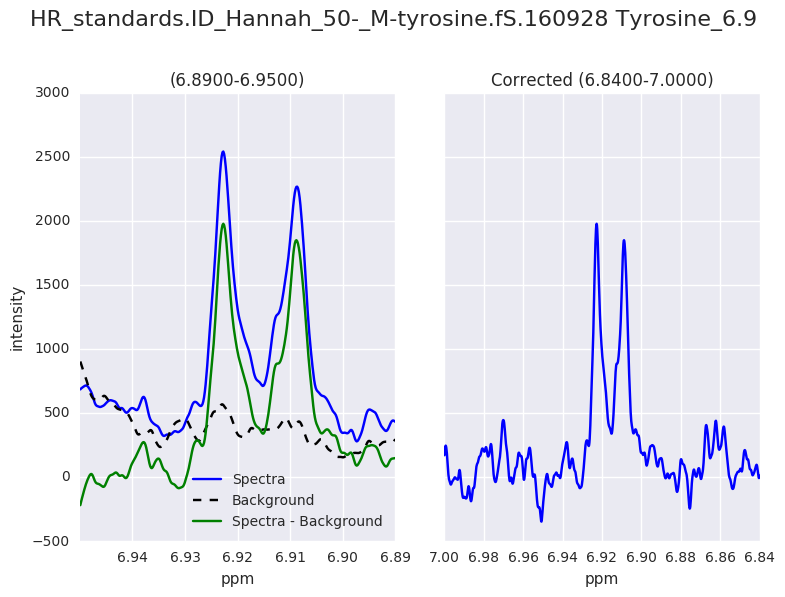

Loading spectra for Tyrosine_6.9 (100)


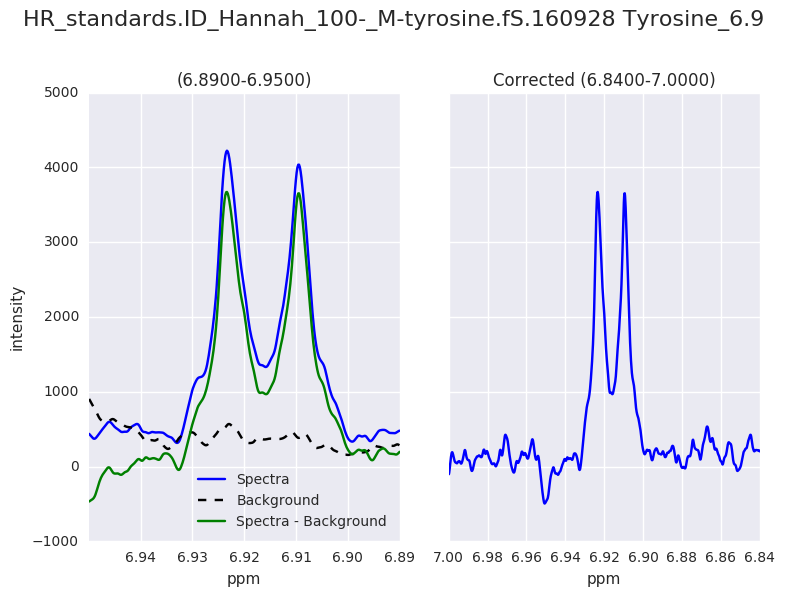

Loading spectra for Tyrosine_6.9 (250)


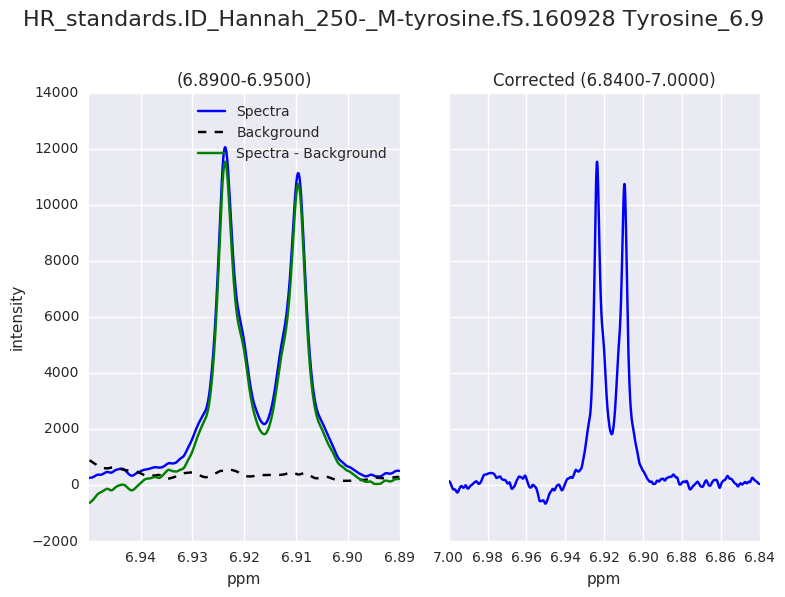

Loading spectra for Tyrosine_6.9 (500)


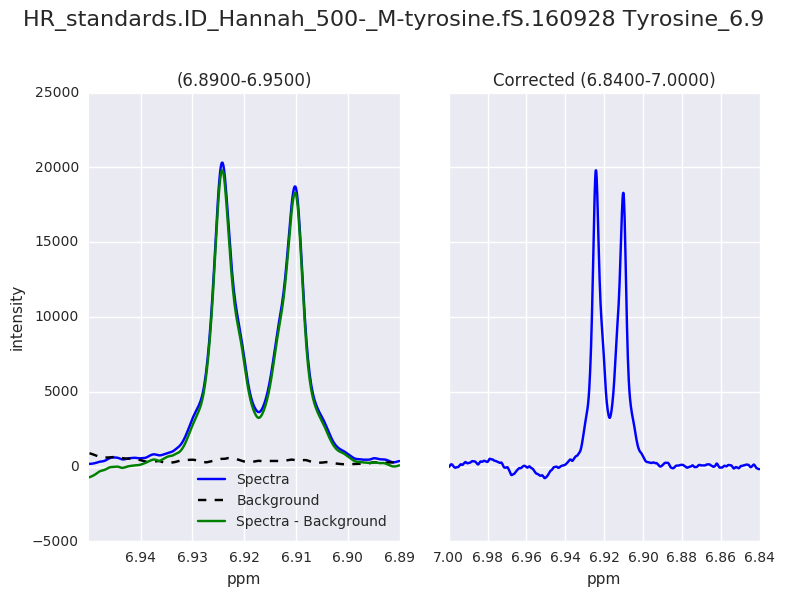



Loading Tyrosine_7.2
Loading spectra for Tyrosine_7.2 (50)


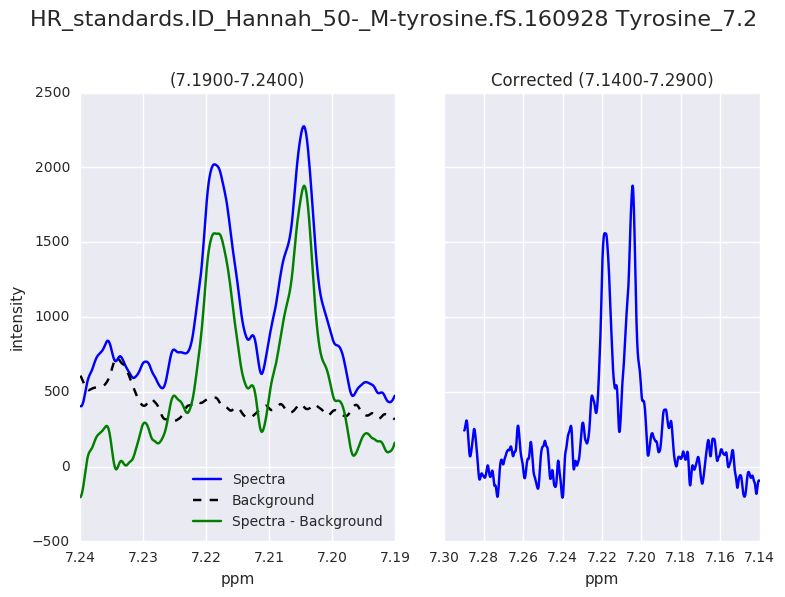

Loading spectra for Tyrosine_7.2 (100)


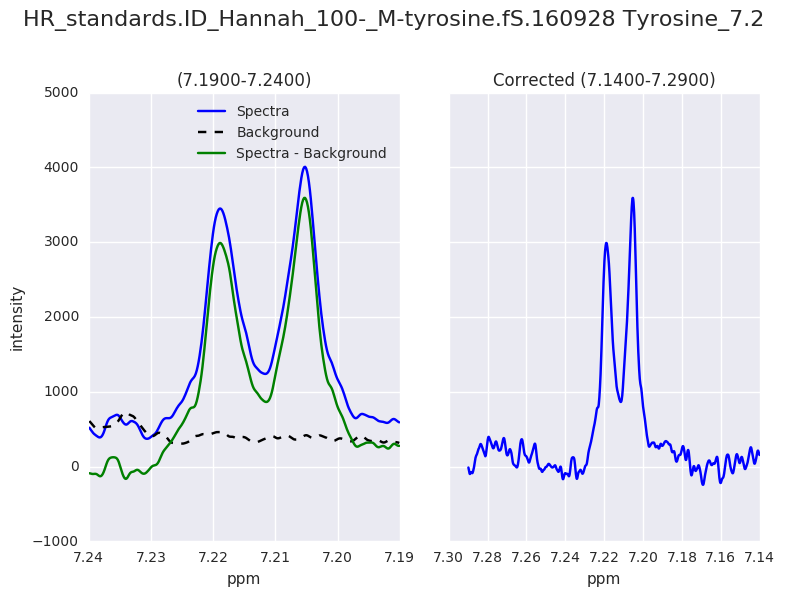

Loading spectra for Tyrosine_7.2 (250)


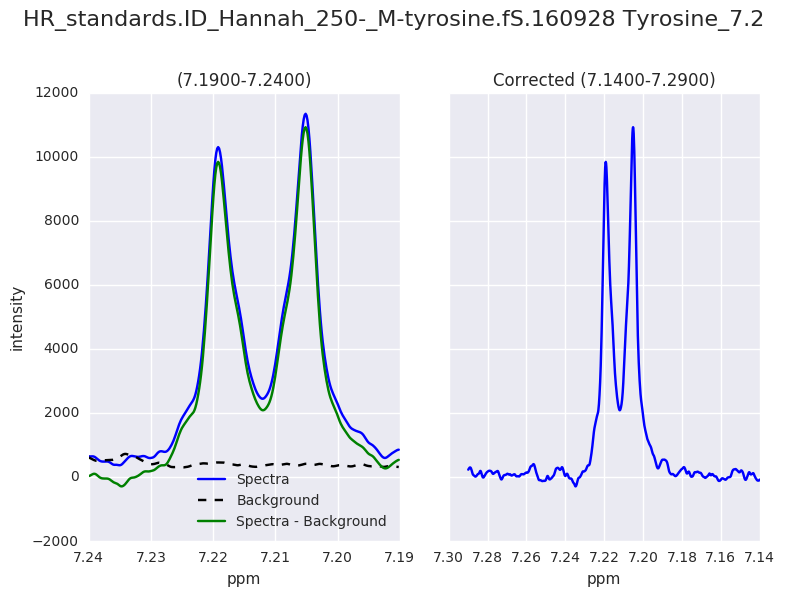

Loading spectra for Tyrosine_7.2 (500)


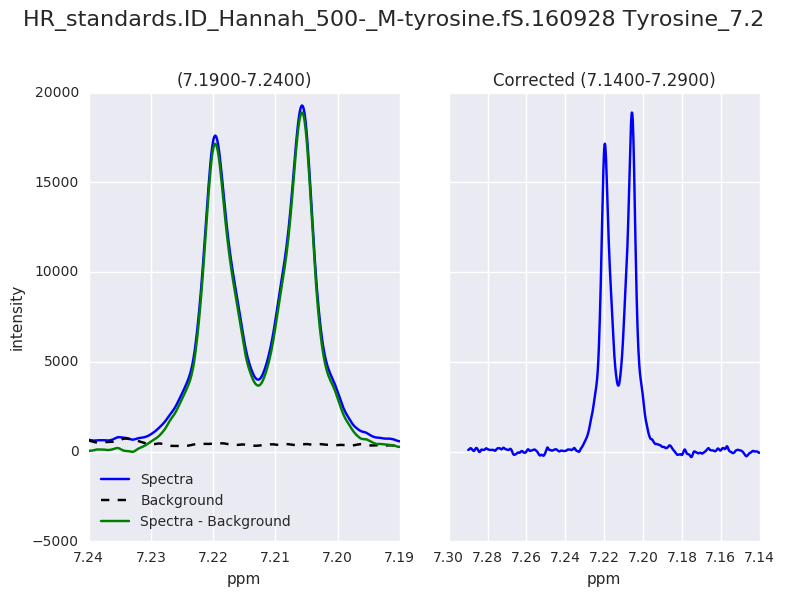



Loading Valine_1.0
Loading spectra for Valine_1.0 (50)


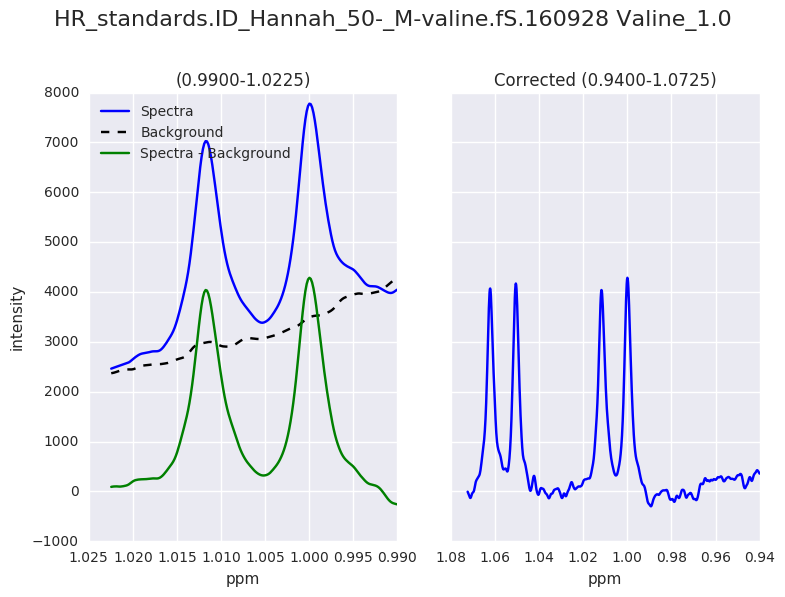

Loading spectra for Valine_1.0 (100)


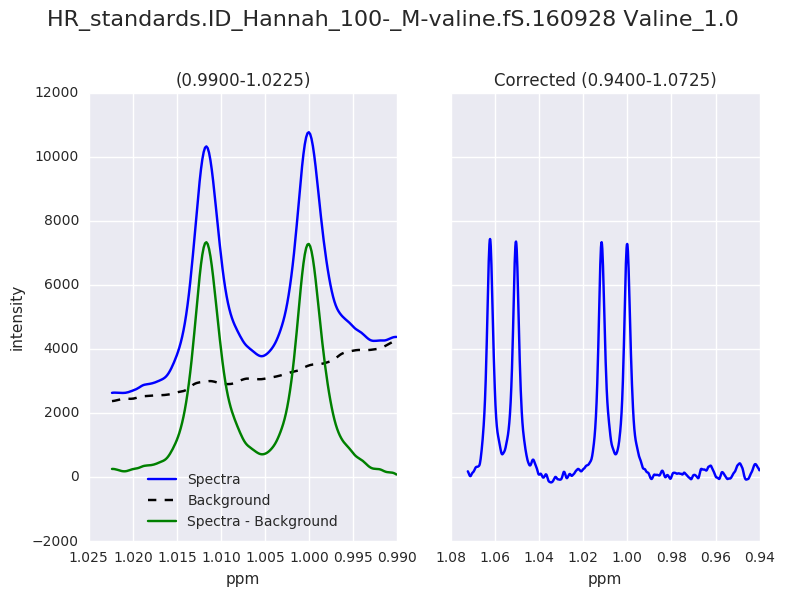

Loading spectra for Valine_1.0 (250)


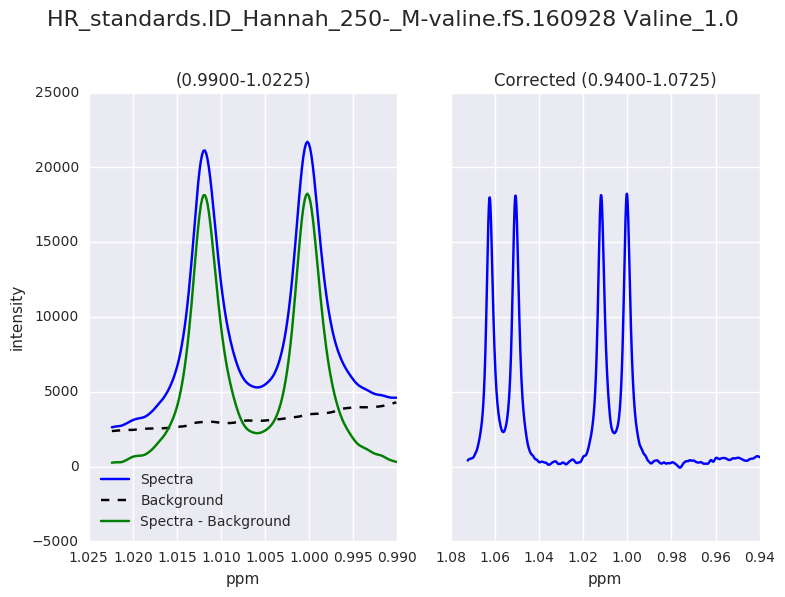

Loading spectra for Valine_1.0 (500)


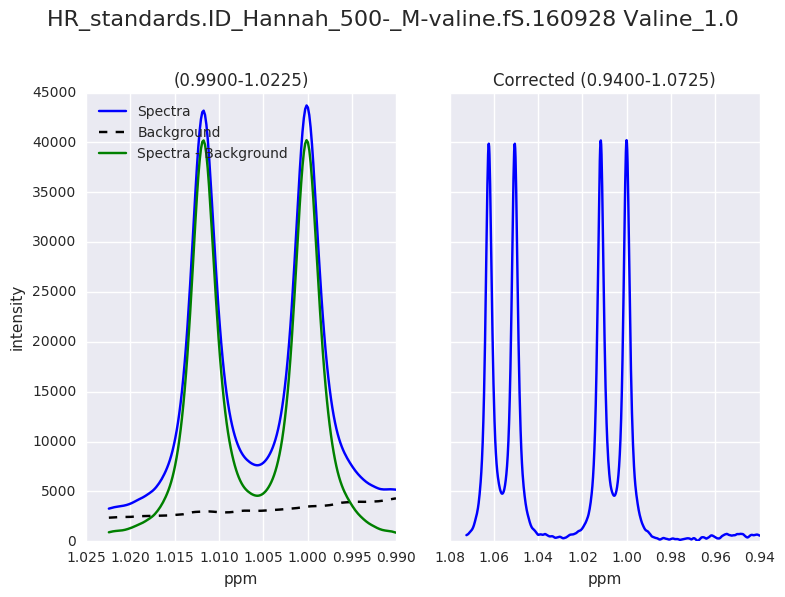



Loading Valine_1.1
Loading spectra for Valine_1.1 (50)


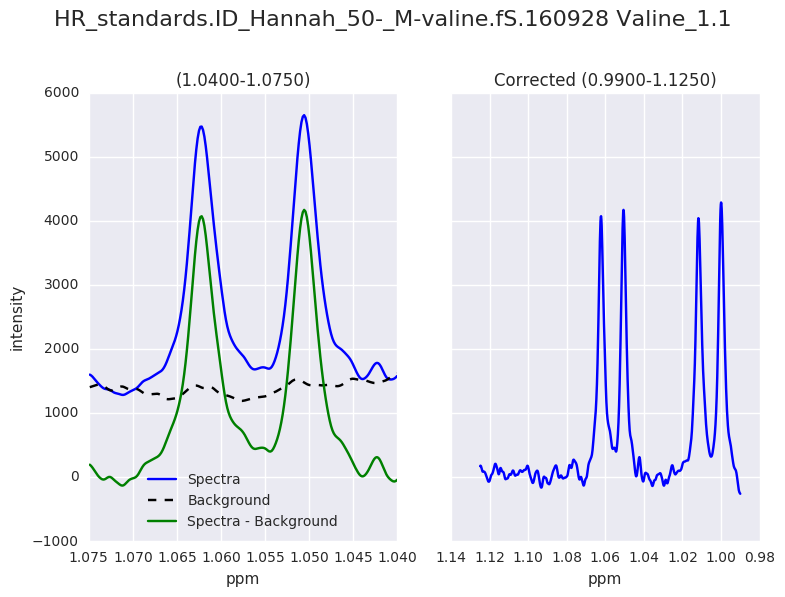

Loading spectra for Valine_1.1 (100)


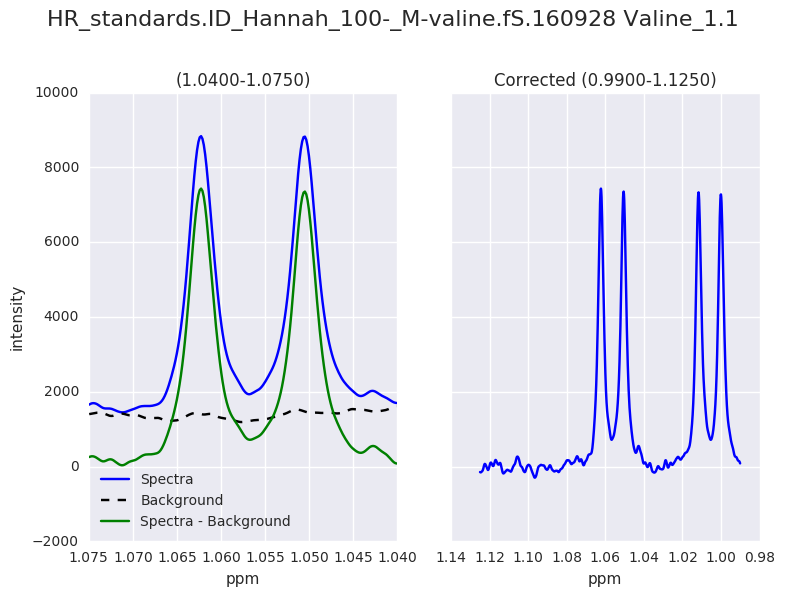

Loading spectra for Valine_1.1 (250)


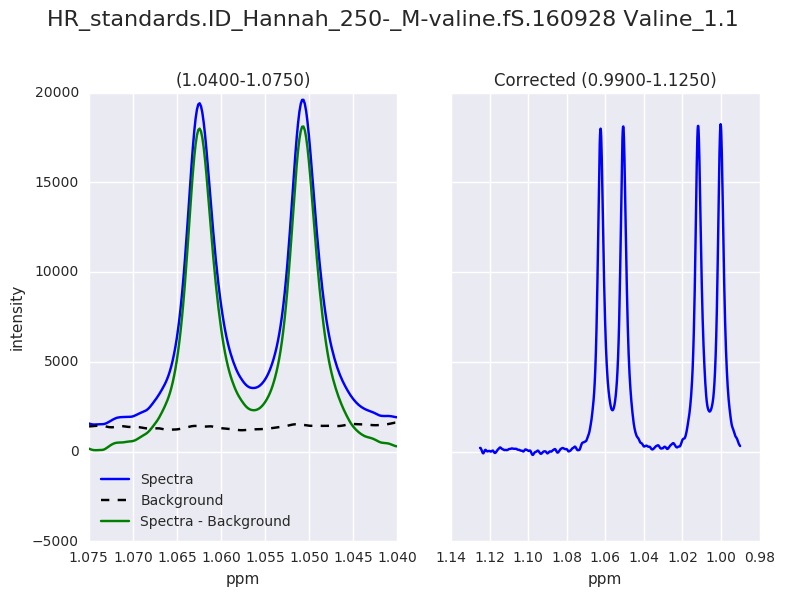

Loading spectra for Valine_1.1 (500)


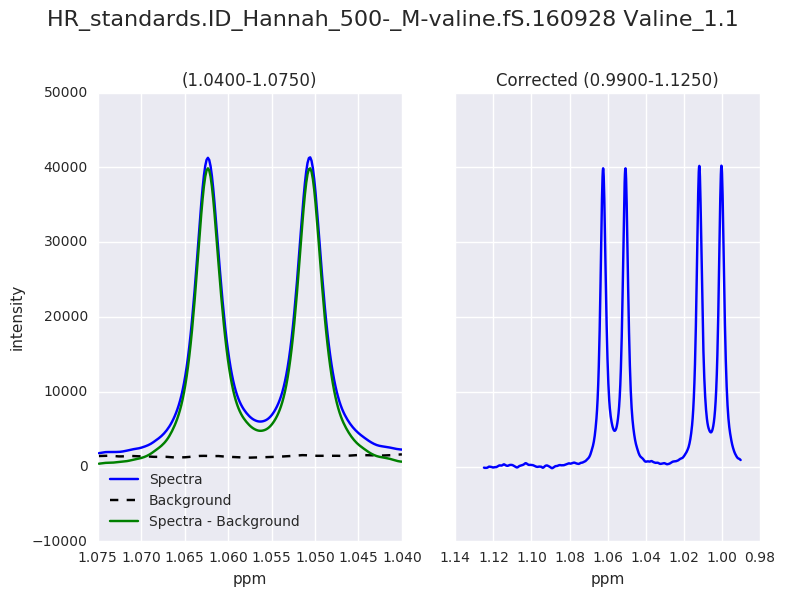

In [7]:
for name in sorted(pipeline.db.metabolites.keys()):
    if name == 'TSP':
        continue
    print '======================================================='
    print 'Loading %s' % name
    print '======================================================='    
    for c in std_concentrations:
        input_spectra = '/home/rstudio/NMR/data/Hannah_NMR/HR_standards.ID_Hannah_%d-_M-%s.fS.160928' % (c, lower_names[name])
        pipeline.load_spiked(name, c, input_spectra)
    print
    print

## 3. Optimise model parameters

In [8]:
tsp_concentration = 2320

In [10]:
db = pipeline.db
for name in sorted(db.metabolites.keys()):
    # do not optimise TSP    
    if name == 'TSP':
        continue        
    # a new copy of the db is created each time with the corrected relative intensity
    db = pipeline.update_rel_intensities(db, name, std_concentrations, tsp_concentration)

Updating relative intensities for Acetate_1.9
tsp_area=21169274.594343, metabo_area=83301.651326, correction=1.643267
tsp_area=21163049.743157, metabo_area=381744.020212, correction=3.766383
tsp_area=20762272.930678, metabo_area=894465.922444, correction=3.598151
tsp_area=22389479.049913, metabo_area=1939061.762983, correction=3.616664
Rel. intensities: initial = 3.000000, corrected = 3.607407

Updating relative intensities for Alanine_1.5
tsp_area=21065404.268182, metabo_area=244810.927051, correction=4.853125
tsp_area=20905811.900534, metabo_area=515435.085974, correction=5.147987
tsp_area=22137782.404933, metabo_area=1131497.528699, correction=4.268841
tsp_area=21989472.060571, metabo_area=2440849.261939, correction=4.635394
Rel. intensities: initial = 3.000000, corrected = 4.744260

Updating relative intensities for Citrate_2.6
tsp_area=20006127.636799, metabo_area=170756.106524, correction=3.564295
tsp_area=21036595.946455, metabo_area=293530.289790, correction=2.913453
tsp_area=2

In [11]:
display(db.df)

name    ppm  start     end couple_code  j_constant  \
0                 TSP  0.000 -0.050  0.0500           0           0   
1         Acetate_1.9  1.932  1.920  1.9500           0           0   
2         Alanine_1.5  1.495  1.450  1.5400           1        7.21   
3         Alanine_3.8  3.803  3.790  3.8150           3         7.3   
4         Citrate_2.6  2.558  2.530  2.5900           1        15.1   
5         Citrate_2.7  2.675  2.650  2.7000           1       15.08   
6         Glucose_3.6  3.558  3.535  3.5720         1,1  9.91, 3.83   
7         Glucose_5.3  5.256  5.240  5.2700           1        3.89   
8       Glutamine_3.8  3.780  3.750  3.7900           2        6.18   
9         Glycine_3.6  3.577  3.560  3.5900           0           0   
10      Histidine_3.1  3.130  3.090  3.1700         1,1  7.87, 7.70   
11      Histidine_4.0  3.985  3.950  4.0100         1,1  4.94, 3.19   
12      Histidine_7.1  7.070  7.050  7.0900           0           0   
13      Histidine_7.8  7.785  7.760  7.8100           0           0   
14     Isoleucine_0.9  0.953  0.925  0.9800           2         7.5   
15     Isoleucine_1.0  1.024  1.000  1.0500           1        7.02   
16     Isoleucine_3.7  3.685  3.665  3.6950           1        4.19   
17        Lactate_1.3  1.343  1.330  1.3600           1         6.8   
18        Lactate_4.1  4.126  4.100  4.1500           3         6.7   
19        Leucine_1.0  0.976  0.950  0.9900           2         6.3   
20         Lysine_3.0  3.049  3.020  3.0800           2        7.75   
21         Lysine_3.8  3.766  3.740  3.7800           2         6.3   
22      Threonine_1.3  1.343  1.325  1.3600           1         6.5   
23      Threonine_3.6  3.597  3.570  3.6000           1        4.85   
24           TMAO_3.3  3.278  3.260  3.2950           0           0   
25       Tyrosine_3.1  3.063  3.025  3.0950         1,1  8.05, 6.94   
26       Tyrosine_6.9  6.917  6.890  6.9500           1        8.69   
27       Tyrosine_7.2  7.212  7.190  7.2400           1        8.58   
28  Phenylalanine_3.1  3.134  3.090  3.1700         1,1  8.10, 6.56   
29  Phenylalanine_4.0  4.005  3.960  4.0200         1,1  5.24, 2.54   
30  Phenylalanine_7.3  7.349  7.320  7.3700           1        7.46   
31         Valine_1.0  1.005  0.990  1.0225           1        6.99   
32         Valine_1.1  1.056  1.040  1.0750           1        7.04   
33         Valine_3.6  3.625  3.605  3.6400           1        4.48   

    rel_intensity enabled      note  
0        9.000000       Y        OK  
1        3.607407       Y        OK  
2        4.744260       Y        OK  
3        1.000000       N  TO CHECK  
4        3.045893       Y        OK  
5        3.203181       Y        OK  
6        1.000000       N  TO CHECK  
7        0.725667       Y        OK  
8        1.000000       N  TO CHECK  
9        2.000000       N  TO CHECK  
10       1.000000       N  TO CHECK  
11       1.000000       N  TO CHECK  
12       1.420228       Y        OK  
13       1.196095       Y        OK  
14       5.322414       Y  TO CHECK  
15       4.699498       Y        OK  
16       1.342072       Y        OK  
17       5.712527       Y        OK  
18       1.000000       N  TO CHECK  
19       9.739460       Y        OK  
20       3.002010       Y        OK  
21       1.000000       N  TO CHECK  
22       3.000000       N  TO CHECK  
23       1.000000       N  TO CHECK  
24      13.645167       Y        OK  
25       1.000000       N  TO CHECK  
26       3.359961       Y        OK  
27       3.470050       Y        OK  
28       2.000000       N  TO CHECK  
29       1.000000       N  TO CHECK  
30       2.737909       Y        OK  
31       4.377747       Y        OK  
32       4.356568       Y        OK  
33       1.000000       N  TO CHECK

## 4. Save the DB

In [12]:
db.df.to_csv('/home/rstudio/codes/databases/default_optimised_db.csv', index=False)